Data-prepping for approach to predict the bike trips

In [1]:
import seaborn as sb
import numpy as np
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import matplotlib.pyplot as plt

In [2]:
# Load the data
sf_train_main = pd.read_csv('train_main_SF.csv')
sj_train_main = pd.read_csv('train_main_SJ.csv')
re_train_main = pd.read_csv('train_main_Redwood.csv')
pa_train_main = pd.read_csv('train_main_palo.csv')
mv_train_main = pd.read_csv('train_main_MV.csv')

In [3]:
sf_train_main.head()

date  trip_count
0  2013-08-29          37
1  2013-08-30          43
2  2013-08-31          51
3  2013-09-01          29
4  2013-09-02          54

In [4]:
sj_train_main.head()

date  trip_count
0  2013-08-29           2
1  2013-08-30           1
2  2013-08-31           8
3  2013-09-01           7
4  2013-09-02           1

In [5]:
re_train_main.head()

date  trip_count
0  2013-08-29           2
1  2013-08-30           1
2  2013-08-31           5
3  2013-09-01           5
4  2013-09-02           1

In [6]:
pa_train_main.head()

date  trip_count
0  2013-08-29           4
1  2013-08-30           7
2  2013-08-31           5
3  2013-09-01           3
4  2013-09-03           3

In [7]:
mv_train_main.head()

date  trip_count
0  2013-08-29           5
1  2013-08-30           5
2  2013-08-31           6
3  2013-09-01           4
4  2013-09-02          12

In [8]:
# Load the stations data
stations_sf = pd.read_csv('station_san_francisco.csv')
stations_mv = pd.read_csv('station_mountain_view.csv')
stations_pa = pd.read_csv('station_palo_alto.csv')
stations_re = pd.read_csv('station_redwood_city.csv')
stations_sj = pd.read_csv('station_san_jose.csv')

In [9]:
stations_sf.head()

id                      name        lat        long  dock_count  \
0  41           Clay at Battery  37.795001 -122.399970          15   
1  42          Davis at Jackson  37.797280 -122.398436          15   
2  45  Commercial at Montgomery  37.794231 -122.402923          15   
3  46     Washington at Kearney  37.795425 -122.404767          15   
4  47           Post at Kearney  37.788975 -122.403452          19   

            city installation_date  
0  San Francisco        2013-08-19  
1  San Francisco        2013-08-19  
2  San Francisco        2013-08-19  
3  San Francisco        2013-08-19  
4  San Francisco        2013-08-19

In [10]:
stations_mv.head()

id                            name        lat        long  dock_count  \
0  27         Mountain View City Hall  37.389218 -122.081896          15   
1  28  Mountain View Caltrain Station  37.394358 -122.076713          23   
2  29    San Antonio Caltrain Station  37.406940 -122.106758          23   
3  30            Evelyn Park and Ride  37.390277 -122.066553          15   
4  31     San Antonio Shopping Center  37.400443 -122.108338          15   

            city installation_date  
0  Mountain View        2013-08-16  
1  Mountain View        2013-08-15  
2  Mountain View        2013-08-15  
3  Mountain View        2013-08-16  
4  Mountain View        2013-12-31

In [11]:
stations_pa.head()

id                             name        lat        long  dock_count  \
0  34       Palo Alto Caltrain Station  37.443988 -122.164759          23   
1  35           University and Emerson  37.444521 -122.163093          11   
2  36  California Ave Caltrain Station  37.429082 -122.142805          15   
3  37             Cowper at University  37.448598 -122.159504          11   
4  38                    Park at Olive  37.425684 -122.137777          15   

        city installation_date  
0  Palo Alto        2013-08-14  
1  Palo Alto        2013-08-15  
2  Palo Alto        2013-08-14  
3  Palo Alto        2013-08-14  
4  Palo Alto        2013-08-14

In [12]:
stations_re.head()

id                           name        lat        long  dock_count  \
0  21              Franklin at Maple  37.481758 -122.226904          15   
1  22  Redwood City Caltrain Station  37.486078 -122.232089          25   
2  23        San Mateo County Center  37.487616 -122.229951          15   
3  24    Redwood City Public Library  37.484219 -122.227424          15   
4  25       Stanford in Redwood City  37.485370 -122.203288          15   

           city installation_date  
0  Redwood City        2013-08-12  
1  Redwood City        2013-08-15  
2  Redwood City        2013-08-15  
3  Redwood City        2013-08-12  
4  Redwood City        2013-08-12

In [13]:
stations_sj.head()

id                               name        lat        long  dock_count  \
0   2  San Jose Diridon Caltrain Station  37.329732 -121.901782          27   
1   3              San Jose Civic Center  37.330698 -121.888979          15   
2   4             Santa Clara at Almaden  37.333988 -121.894902          11   
3   5                   Adobe on Almaden  37.331415 -121.893200          19   
4   6                   San Pedro Square  37.336721 -121.894074          15   

       city installation_date  
0  San Jose        2013-08-06  
1  San Jose        2013-08-05  
2  San Jose        2013-08-06  
3  San Jose        2013-08-05  
4  San Jose        2013-08-07

In [15]:
# Load the weather data
weather_sf = pd.read_csv('weather_94107_SF.csv')
weather_mv = pd.read_csv('weather_94041_MountainView.csv')
weather_pa = pd.read_csv('weather_94301_PaloAlto.csv')
weather_re = pd.read_csv('weather_94063_Redwood.csv')
weather_sj = pd.read_csv('weather_95113_SanJose.csv')

In [16]:
weather_mv.head()

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0   1/1/2014               59.0                46.0               34.0   
1   1/1/2015               54.0                43.0               32.0   
2  1/10/2014               63.0                49.0               40.0   
3  1/10/2015               60.0                53.0               46.0   
4  1/11/2014               59.0                49.0               43.0   

   max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
0             44.0              36.0             28.0          80.0   
1             28.0              24.0             16.0          64.0   
2             50.0              41.0             34.0          86.0   
3             50.0              47.0             45.0          93.0   
4             50.0              42.0             37.0          86.0   

   mean_humidity  min_humidity  ...  mean_visibility_miles  \
0           69.0          53.0  ...                    8.0   
1           45.0          26.0  ...                   10.0   
2           74.0          57.0  ...                   10.0   
3           79.0          64.0  ...                    7.0   
4           77.0          69.0  ...                   10.0   

   min_visibility_miles  max_wind_Speed_mph  mean_wind_speed_mph  \
0                   6.0                14.0                  2.0   
1                  10.0                14.0                  2.0   
2                   8.0                14.0                  1.0   
3                   5.0                 8.0                  2.0   
4                   8.0                20.0                  1.0   

   max_gust_speed_mph  precipitation_inches  cloud_cover     events  \
0                14.0                   0.0          0.0  clear-day   
1                16.0                   0.0          0.0  clear-day   
2                14.0                   0.0          2.0  clear-day   
3                 8.0                   0.0          2.0  clear-day   
4                20.0                   0.0          3.0  clear-day   

   wind_dir_degrees  zip_code  
0             348.0     94041  
1             311.0     94041  
2             350.0     94041  
3             301.0     94041  
4             261.0     94041  

[5 rows x 24 columns]

In [17]:
weather_mv['date'] = pd.to_datetime(weather_mv['date'], format='%m/%d/%Y')

# Convert datetime64 to string in desired format (optional step for output purposes)
weather_mv['date'] = weather_mv['date'].dt.strftime('%Y-%m-%d')

weather_mv['date'].head()

0    2014-01-01
1    2015-01-01
2    2014-01-10
3    2015-01-10
4    2014-01-11
Name: date, dtype: object

In [18]:
weather_sf.head()

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0   1/1/2014               56.0                49.0               41.0   
1   1/1/2015               56.0                47.0               38.0   
2  1/10/2014               60.0                54.0               48.0   
3  1/10/2015               60.0                54.0               47.0   
4  1/11/2014               58.0                52.0               46.0   

   max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
0             45.0              40.0             36.0          83.0   
1             27.0              20.0             14.0          54.0   
2             48.0              46.0             43.0          89.0   
3             52.0              49.0             45.0          93.0   
4             51.0              46.0             42.0          93.0   

   mean_humidity  min_humidity  ...  mean_visibility_miles  \
0           69.0          55.0  ...                    9.0   
1           37.0          20.0  ...                   10.0   
2           75.0          60.0  ...                    9.0   
3           83.0          72.0  ...                    7.0   
4           83.0          72.0  ...                   10.0   

   min_visibility_miles  max_wind_Speed_mph  mean_wind_speed_mph  \
0                   7.0                 9.0                  1.0   
1                  10.0                23.0                  8.0   
2                   6.0                15.0                  6.0   
3                   4.0                 8.0                  3.0   
4                   6.0                18.0                  6.0   

   max_gust_speed_mph  precipitation_inches  cloud_cover     events  \
0                10.0                   0.0          3.0  clear-day   
1                28.0                   0.0          1.0  clear-day   
2                17.0                   0.0          4.0  clear-day   
3                10.0                   0.0          6.0        fog   
4                22.0                   0.0          4.0  clear-day   

   wind_dir_degrees  zip_code  
0             290.0     94107  
1              40.0     94107  
2             310.0     94107  
3             280.0     94107  
4             281.0     94107  

[5 rows x 24 columns]

In [19]:
weather_sf['date'] = pd.to_datetime(weather_sf['date'], format='%m/%d/%Y')

# Convert datetime64 to string in desired format (optional step for output purposes)
weather_sf['date'] = weather_sf['date'].dt.strftime('%Y-%m-%d')

weather_sf['date'].head()

0    2014-01-01
1    2015-01-01
2    2014-01-10
3    2015-01-10
4    2014-01-11
Name: date, dtype: object

In [20]:
weather_pa.head()

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0   1/1/2014               59.0                48.0               36.0   
1   1/1/2015               57.0                45.0               33.0   
2  1/10/2014               64.0                53.0               41.0   
3  1/10/2015               59.0                54.0               50.0   
4  1/11/2014               59.0                52.0               44.0   

   max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
0             42.0              36.0             32.0          85.0   
1             34.0              27.0             23.0          81.0   
2             49.0              44.0             37.0          89.0   
3             54.0              52.0             48.0         100.0   
4             49.0              45.0             40.0          93.0   

   mean_humidity  min_humidity  ...  mean_visibility_miles  \
0           63.0          40.0  ...                    8.0   
1           49.0          27.0  ...                   10.0   
2           71.0          52.0  ...                   10.0   
3           92.0          82.0  ...                    6.0   
4           80.0          67.0  ...                   10.0   

   min_visibility_miles  max_wind_Speed_mph  mean_wind_speed_mph  \
0                   6.0                 8.0                  1.0   
1                  10.0                 7.0                  4.0   
2                   8.0                10.0                  2.0   
3                   4.0                 9.0                  5.0   
4                   8.0                15.0                  2.0   

   max_gust_speed_mph  precipitation_inches  cloud_cover     events  \
0           12.000000                   0.0          0.0  clear-day   
1           22.297757                   0.0          0.0  clear-day   
2           12.000000                   0.0          2.0  clear-day   
3           22.297757                   0.0          6.0  clear-day   
4           20.000000                   0.0          3.0  clear-day   

   wind_dir_degrees  zip_code  
0             348.0     94301  
1             347.0     94301  
2             350.0     94301  
3             350.0     94301  
4             261.0     94301  

[5 rows x 24 columns]

In [21]:
weather_pa['date'] = pd.to_datetime(weather_pa['date'], format='%m/%d/%Y')

# Convert datetime64 to string in desired format (optional step for output purposes)
weather_pa['date'] = weather_pa['date'].dt.strftime('%Y-%m-%d')

weather_pa['date'].head()

0    2014-01-01
1    2015-01-01
2    2014-01-10
3    2015-01-10
4    2014-01-11
Name: date, dtype: object

In [22]:
weather_re.head()

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0   1/1/2014               55.0                47.0               39.0   
1   1/1/2015               55.0                46.0               37.0   
2  1/10/2014               59.0                52.0               44.0   
3  1/10/2015               59.0                54.0               48.0   
4  1/11/2014               57.0                50.0               44.0   

   max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
0             45.0              38.0             36.0          93.0   
1             32.0              26.0             18.0          65.0   
2             50.0              44.0             39.0          94.0   
3             54.0              48.0             46.0         100.0   
4             50.0              45.0             41.0          93.0   

   mean_humidity  min_humidity  ...  mean_visibility_miles  \
0           82.0          58.0  ...                    8.0   
1           50.0          25.0  ...                   10.0   
2           82.0          63.0  ...                   10.0   
3           90.0          67.0  ...                    9.0   
4           86.0          72.0  ...                    9.0   

   min_visibility_miles  max_wind_Speed_mph  mean_wind_speed_mph  \
0                   4.0                 6.0                  0.0   
1                  10.0                 8.0                  2.0   
2                   7.0                 7.0                  2.0   
3                   3.0                 7.0                  3.0   
4                   6.0                 8.0                  2.0   

   max_gust_speed_mph  precipitation_inches  cloud_cover     events  \
0           22.297757                   0.0          1.0  clear-day   
1           22.297757                   0.0          1.0  clear-day   
2           22.297757                   0.0          2.0  clear-day   
3           22.297757                   0.0          3.0  clear-day   
4           22.297757                   0.0          4.0  clear-day   

   wind_dir_degrees  zip_code  
0              54.0     94063  
1             314.0     94063  
2             342.0     94063  
3             325.0     94063  
4             269.0     94063  

[5 rows x 24 columns]

In [23]:
weather_re['date'] = pd.to_datetime(weather_re['date'], format='%m/%d/%Y')

# Convert datetime64 to string in desired format (optional step for output purposes)
weather_re['date'] = weather_re['date'].dt.strftime('%Y-%m-%d')

weather_re['date'].head()

0    2014-01-01
1    2015-01-01
2    2014-01-10
3    2015-01-10
4    2014-01-11
Name: date, dtype: object

In [24]:
weather_sj.head()

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0   1/1/2014               62.0                49.0               35.0   
1   1/1/2015               53.0                42.0               30.0   
2  1/10/2014               62.0                52.0               41.0   
3  1/10/2015               61.0                54.0               46.0   
4  1/11/2014               59.0                51.0               43.0   

   max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
0             36.0              34.0             32.0          89.0   
1             27.0              23.0             18.0          64.0   
2             48.0              43.0             37.0          86.0   
3             50.0              47.0             44.0         100.0   
4             50.0              44.0             40.0          93.0   

   mean_humidity  min_humidity  ...  mean_visibility_miles  \
0           62.0          34.0  ...                    8.0   
1           46.0          28.0  ...                   10.0   
2           69.0          52.0  ...                   10.0   
3           80.0          60.0  ...                    8.0   
4           78.0          62.0  ...                   10.0   

   min_visibility_miles  max_wind_Speed_mph  mean_wind_speed_mph  \
0                   6.0                 8.0                  1.0   
1                  10.0                 8.0                  3.0   
2                  10.0                 8.0                  2.0   
3                   5.0                 9.0                  2.0   
4                  10.0                20.0                  3.0   

   max_gust_speed_mph  precipitation_inches  cloud_cover     events  \
0                10.0                   0.0          2.0  clear-day   
1                10.0                   0.0          0.0  clear-day   
2                13.0                   0.0          3.0  clear-day   
3                10.0                   0.0          4.0  clear-day   
4                24.0                   0.0          4.0  clear-day   

   wind_dir_degrees  zip_code  
0             310.0     95113  
1             129.0     95113  
2             297.0     95113  
3             293.0     95113  
4             349.0     95113  

[5 rows x 24 columns]

In [25]:
weather_sj['date'] = pd.to_datetime(weather_sj['date'], format='%m/%d/%Y')

# Convert datetime64 to string in desired format (optional step for output purposes)
weather_sj['date'] = weather_sj['date'].dt.strftime('%Y-%m-%d')

weather_sj['date'].head()

0    2014-01-01
1    2015-01-01
2    2014-01-10
3    2015-01-10
4    2014-01-11
Name: date, dtype: object

In [26]:
# Find holidays in the range of the data
cal = USFederalHolidayCalendar()
holidays_sf = cal.holidays(start=sf_train_main['date'].min(), end=sf_train_main['date'].max())
holidays_sf

holidays_sj = cal.holidays(start=sj_train_main['date'].min(), end=sj_train_main['date'].max())
holidays_sj

holidays_re = cal.holidays(start=re_train_main['date'].min(), end=re_train_main['date'].max())
holidays_re

holidays_pa = cal.holidays(start=pa_train_main['date'].min(), end=pa_train_main['date'].max())
holidays_pa

holidays_mv = cal.holidays(start=mv_train_main['date'].min(), end=mv_train_main['date'].max())
holidays_mv

DatetimeIndex(['2013-09-02', '2013-10-14', '2013-11-11', '2013-11-28',
               '2013-12-25', '2014-01-01', '2014-01-20', '2014-02-17',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13',
               '2014-11-11', '2014-11-27', '2014-12-25', '2015-01-01',
               '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-03'],
              dtype='datetime64[ns]', freq=None)

In [27]:
# Find business days in the range of the data
business_days_sf = pd.bdate_range(start=sf_train_main['date'].min(), end=sf_train_main['date'].max())
business_days_sf

business_days_sj = pd.bdate_range(start=sj_train_main['date'].min(), end=sj_train_main['date'].max())
business_days_sj

business_days_re = pd.bdate_range(start=re_train_main['date'].min(), end=re_train_main['date'].max())
business_days_re

business_days_pa = pd.bdate_range(start=pa_train_main['date'].min(), end=pa_train_main['date'].max())
business_days_pa

business_days_mv = pd.bdate_range(start=mv_train_main['date'].min(), end=mv_train_main['date'].max())
business_days_mv

DatetimeIndex(['2013-08-29', '2013-08-30', '2013-09-02', '2013-09-03',
               '2013-09-04', '2013-09-05', '2013-09-06', '2013-09-09',
               '2013-09-10', '2013-09-11',
               ...
               '2015-08-18', '2015-08-19', '2015-08-20', '2015-08-21',
               '2015-08-24', '2015-08-25', '2015-08-26', '2015-08-27',
               '2015-08-28', '2015-08-31'],
              dtype='datetime64[ns]', length=523, freq='B')

In [28]:
# Datatype of holidays
type(holidays_sf)

pandas.core.indexes.datetimes.DatetimeIndex

In [29]:
holidays_sf = pd.to_datetime(holidays_sf, format = '%Y/%m/%d').date
holidays_sj = pd.to_datetime(holidays_sj, format = '%Y/%m/%d').date
holidays_pa = pd.to_datetime(holidays_pa, format = '%Y/%m/%d').date
holidays_re = pd.to_datetime(holidays_re, format = '%Y/%m/%d').date
holidays_mv = pd.to_datetime(holidays_mv, format = '%Y/%m/%d').date

In [30]:
# Datatype of holidays
type(holidays_sf)

numpy.ndarray

In [31]:
# Dataype of business days
type(business_days_sf)

pandas.core.indexes.datetimes.DatetimeIndex

In [32]:
business_days_sf = pd.to_datetime(business_days_sf, format = '%Y/%m/%d').date
business_days_sj = pd.to_datetime(business_days_sj, format = '%Y/%m/%d').date
business_days_re = pd.to_datetime(business_days_re, format = '%Y/%m/%d').date
business_days_pa = pd.to_datetime(business_days_pa, format = '%Y/%m/%d').date
business_days_mv = pd.to_datetime(business_days_mv, format = '%Y/%m/%d').date

In [33]:
# Dataype of business days
type(business_days_sf)

numpy.ndarray

In [34]:
#SF
sf_train_main['holiday'] = sf_train_main['date'].isin(holidays_sf)
sf_train_main['business_day'] = sf_train_main['date'].isin(business_days_sf)

#SJ
sj_train_main['holiday'] = sj_train_main['date'].isin(holidays_sj)
sj_train_main['business_day'] = sj_train_main['date'].isin(business_days_sj)

#PA
pa_train_main['holiday'] = pa_train_main['date'].isin(holidays_pa)
pa_train_main['business_day'] = pa_train_main['date'].isin(business_days_pa)

#MV
mv_train_main['holiday'] = mv_train_main['date'].isin(holidays_mv)
mv_train_main['business_day'] = mv_train_main['date'].isin(business_days_mv)

#RE
re_train_main['holiday'] = re_train_main['date'].isin(holidays_re)
re_train_main['business_day'] = re_train_main['date'].isin(business_days_re)

In [35]:
sf_train_main['holiday'].head()

0    False
1    False
2    False
3    False
4    False
Name: holiday, dtype: bool

In [36]:
sf_train_main['business_day'].head()

0    False
1    False
2    False
3    False
4    False
Name: business_day, dtype: bool

In [37]:
sf_train_main['month'] = pd.to_datetime(sf_train_main.date).dt.month
sj_train_main['month'] = pd.to_datetime(sj_train_main.date).dt.month
re_train_main['month'] = pd.to_datetime(re_train_main.date).dt.month
pa_train_main['month'] = pd.to_datetime(pa_train_main.date).dt.month
mv_train_main['month'] = pd.to_datetime(mv_train_main.date).dt.month

In [38]:
sf_train_main.head()

date  trip_count  holiday  business_day  month
0  2013-08-29          37    False         False      8
1  2013-08-30          43    False         False      8
2  2013-08-31          51    False         False      8
3  2013-09-01          29    False         False      9
4  2013-09-02          54    False         False      9

In [39]:
sj_train_main.head()

date  trip_count  holiday  business_day  month
0  2013-08-29           2    False         False      8
1  2013-08-30           1    False         False      8
2  2013-08-31           8    False         False      8
3  2013-09-01           7    False         False      9
4  2013-09-02           1    False         False      9

In [40]:
pa_train_main.head()

date  trip_count  holiday  business_day  month
0  2013-08-29           4    False         False      8
1  2013-08-30           7    False         False      8
2  2013-08-31           5    False         False      8
3  2013-09-01           3    False         False      9
4  2013-09-03           3    False         False      9

In [41]:
mv_train_main.head()

date  trip_count  holiday  business_day  month
0  2013-08-29           5    False         False      8
1  2013-08-30           5    False         False      8
2  2013-08-31           6    False         False      8
3  2013-09-01           4    False         False      9
4  2013-09-02          12    False         False      9

In [42]:
re_train_main.head()

date  trip_count  holiday  business_day  month
0  2013-08-29           2    False         False      8
1  2013-08-30           1    False         False      8
2  2013-08-31           5    False         False      8
3  2013-09-01           5    False         False      9
4  2013-09-02           1    False         False      9

In [43]:
# Datatype of column 'date'
type(mv_train_main['date'][0])

str

In [44]:
# Convert column 'date' to datetime
sf_train_main['date'] = pd.to_datetime(sf_train_main['date'], format = '%Y-%m-%d')

# Convert column 'date' to datetime
pa_train_main['date'] = pd.to_datetime(pa_train_main['date'], format = '%Y-%m-%d')

# Convert column 'date' to datetime
sj_train_main['date'] = pd.to_datetime(sj_train_main['date'], format = '%Y-%m-%d')

# Convert column 'date' to datetime
re_train_main['date'] = pd.to_datetime(re_train_main['date'], format = '%Y-%m-%d')

# Convert column 'date' to datetime
mv_train_main['date'] = pd.to_datetime(mv_train_main['date'], format = '%Y-%m-%d')

In [45]:
# Datatype of column 'date'
type(sf_train_main['date'][0])
type(sj_train_main['date'][0])
type(mv_train_main['date'][0])
type(re_train_main['date'][0])
type(pa_train_main['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [46]:
# For each date in the train_main, tell if day is weekday or not
sf_train_main['weekday'] = sf_train_main['date'].dt.weekday < 5
sj_train_main['weekday'] = sj_train_main['date'].dt.weekday < 5
re_train_main['weekday'] = re_train_main['date'].dt.weekday < 5
pa_train_main['weekday'] = pa_train_main['date'].dt.weekday < 5
mv_train_main['weekday'] = mv_train_main['date'].dt.weekday < 5

In [47]:
sf_train_main.head()

date  trip_count  holiday  business_day  month  weekday
0 2013-08-29          37    False         False      8     True
1 2013-08-30          43    False         False      8     True
2 2013-08-31          51    False         False      8    False
3 2013-09-01          29    False         False      9    False
4 2013-09-02          54    False         False      9     True

In [48]:
sj_train_main.head()

date  trip_count  holiday  business_day  month  weekday
0 2013-08-29           2    False         False      8     True
1 2013-08-30           1    False         False      8     True
2 2013-08-31           8    False         False      8    False
3 2013-09-01           7    False         False      9    False
4 2013-09-02           1    False         False      9     True

In [49]:
pa_train_main.head()

date  trip_count  holiday  business_day  month  weekday
0 2013-08-29           4    False         False      8     True
1 2013-08-30           7    False         False      8     True
2 2013-08-31           5    False         False      8    False
3 2013-09-01           3    False         False      9    False
4 2013-09-03           3    False         False      9     True

In [50]:
re_train_main.head()

date  trip_count  holiday  business_day  month  weekday
0 2013-08-29           2    False         False      8     True
1 2013-08-30           1    False         False      8     True
2 2013-08-31           5    False         False      8    False
3 2013-09-01           5    False         False      9    False
4 2013-09-02           1    False         False      9     True

In [51]:
mv_train_main.head()

date  trip_count  holiday  business_day  month  weekday
0 2013-08-29           5    False         False      8     True
1 2013-08-30           5    False         False      8     True
2 2013-08-31           6    False         False      8    False
3 2013-09-01           4    False         False      9    False
4 2013-09-02          12    False         False      9     True

In [52]:
# Ensure both 'date' columns are in datetime format and normalized
weather_sf['date'] = pd.to_datetime(weather_sf['date']).dt.normalize()
sf_train_main['date'] = pd.to_datetime(sf_train_main['date']).dt.normalize()

# Perform the merge correctly using 'date' as the key
sf_train = pd.merge(weather_sf, sf_train_main, on='date', how='inner')

# Check results
print(f"Data merged for SF, {sf_train.shape[0]} records found.")

Data merged for SF, 731 records found.


In [53]:
sf_train.head()

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0 2014-01-01               56.0                49.0               41.0   
1 2015-01-01               56.0                47.0               38.0   
2 2014-01-10               60.0                54.0               48.0   
3 2015-01-10               60.0                54.0               47.0   
4 2014-01-11               58.0                52.0               46.0   

   max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
0             45.0              40.0             36.0          83.0   
1             27.0              20.0             14.0          54.0   
2             48.0              46.0             43.0          89.0   
3             52.0              49.0             45.0          93.0   
4             51.0              46.0             42.0          93.0   

   mean_humidity  min_humidity  ...  precipitation_inches  cloud_cover  \
0           69.0          55.0  ...                   0.0          3.0   
1           37.0          20.0  ...                   0.0          1.0   
2           75.0          60.0  ...                   0.0          4.0   
3           83.0          72.0  ...                   0.0          6.0   
4           83.0          72.0  ...                   0.0          4.0   

      events  wind_dir_degrees  zip_code  trip_count  holiday  business_day  \
0  clear-day             290.0     94107          37    False         False   
1  clear-day              40.0     94107          19    False         False   
2  clear-day             310.0     94107         115    False         False   
3        fog             280.0     94107          77    False         False   
4  clear-day             281.0     94107          31    False         False   

   month  weekday  
0      1     True  
1      1     True  
2      1     True  
3      1    False  
4      1    False  

[5 rows x 29 columns]

In [54]:
sf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            731 non-null    datetime64[ns]
 1   max_temperature_f               731 non-null    float64       
 2   mean_temperature_f              731 non-null    float64       
 3   min_temperature_f               731 non-null    float64       
 4   max_dew_point_f                 731 non-null    float64       
 5   mean_dew_point_f                731 non-null    float64       
 6   min_dew_point_f                 731 non-null    float64       
 7   max_humidity                    731 non-null    float64       
 8   mean_humidity                   731 non-null    float64       
 9   min_humidity                    731 non-null    float64       
 10  max_sea_level_pressure_inches   731 non-null    float64       
 11  mean_s

In [55]:
sf_train.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
trip_count                        0
holiday                           0
business_day                      0
month                       

In [56]:
# Fill in null values with 0 in dataframes
sf_train.fillna(0, inplace=True)

In [57]:
sf_train.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
trip_count                        0
holiday                           0
business_day                      0
month                       

In [58]:
# Ensure both 'date' columns are in datetime format and normalized
weather_sj['date'] = pd.to_datetime(weather_sj['date']).dt.normalize()
sj_train_main['date'] = pd.to_datetime(sj_train_main['date']).dt.normalize()

# Perform the merge correctly using 'date' as the key
sj_train = pd.merge(weather_sj, sj_train_main, on='date', how='inner')

# Check results
print(f"Data merged for SF, {sj_train.shape[0]} records found.")

Data merged for SF, 700 records found.


In [59]:
sj_train.head()

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0 2014-01-10               62.0                52.0               41.0   
1 2015-01-10               61.0                54.0               46.0   
2 2014-01-11               59.0                51.0               43.0   
3 2015-01-11               55.0                50.0               44.0   
4 2014-01-12               60.0                52.0               43.0   

   max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
0             48.0              43.0             37.0          86.0   
1             50.0              47.0             44.0         100.0   
2             50.0              44.0             40.0          93.0   
3             50.0              47.0             43.0         100.0   
4             46.0              41.0             35.0         100.0   

   mean_humidity  min_humidity  ...  precipitation_inches  cloud_cover  \
0           69.0          52.0  ...                   0.0          3.0   
1           80.0          60.0  ...                   0.0          4.0   
2           78.0          62.0  ...                   0.0          4.0   
3           92.0          83.0  ...                   0.0          6.0   
4           72.0          44.0  ...                   0.0          3.0   

      events  wind_dir_degrees  zip_code  trip_count  holiday  business_day  \
0  clear-day             297.0     95113          11    False         False   
1  clear-day             293.0     95113           4    False         False   
2  clear-day             349.0     95113           9    False         False   
3        fog             292.0     95113           2    False         False   
4  clear-day             264.0     95113           3    False         False   

   month  weekday  
0      1     True  
1      1    False  
2      1    False  
3      1    False  
4      1    False  

[5 rows x 29 columns]

In [60]:
sj_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            700 non-null    datetime64[ns]
 1   max_temperature_f               700 non-null    float64       
 2   mean_temperature_f              700 non-null    float64       
 3   min_temperature_f               700 non-null    float64       
 4   max_dew_point_f                 700 non-null    float64       
 5   mean_dew_point_f                700 non-null    float64       
 6   min_dew_point_f                 700 non-null    float64       
 7   max_humidity                    700 non-null    float64       
 8   mean_humidity                   700 non-null    float64       
 9   min_humidity                    700 non-null    float64       
 10  max_sea_level_pressure_inches   700 non-null    float64       
 11  mean_s

In [61]:
sj_train.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
trip_count                        0
holiday                           0
business_day                      0
month                       

In [62]:
# Fill in null values with 0 in dataframes
sj_train.fillna(0, inplace=True)

In [63]:
sj_train.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
trip_count                        0
holiday                           0
business_day                      0
month                       

In [64]:
# Ensure both 'date' columns are in datetime format and normalized
weather_re['date'] = pd.to_datetime(weather_re['date']).dt.normalize()
re_train_main['date'] = pd.to_datetime(re_train_main['date']).dt.normalize()

# Perform the merge correctly using 'date' as the key
re_train = pd.merge(weather_re, re_train_main, on='date', how='inner')

# Check results
print(f"Data merged for Redwood City, {re_train.shape[0]} records found.")

Data merged for Redwood City, 547 records found.


In [65]:
re_train.head()

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0 2015-01-10               59.0                54.0               48.0   
1 2014-01-12               59.0                50.0               41.0   
2 2015-01-12               62.0                53.0               44.0   
3 2015-01-13               62.0                53.0               44.0   
4 2014-01-14               69.0                55.0               41.0   

   max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
0             54.0              48.0             46.0         100.0   
1             46.0              41.0             36.0         100.0   
2             50.0              46.0             43.0         100.0   
3             48.0              43.0             37.0         100.0   
4             45.0              33.0             27.0          81.0   

   mean_humidity  min_humidity  ...  precipitation_inches  cloud_cover  \
0           90.0          67.0  ...                   0.0          3.0   
1           78.0          44.0  ...                   0.0          2.0   
2           90.0          59.0  ...                   0.0          1.0   
3           78.0          45.0  ...                   0.0          1.0   
4           54.0          20.0  ...                   0.0          0.0   

      events  wind_dir_degrees  zip_code  trip_count  holiday  business_day  \
0  clear-day             325.0     94063           1    False         False   
1  clear-day             271.0     94063           4    False         False   
2  clear-day              36.0     94063           7    False         False   
3  clear-day             192.0     94063           8    False         False   
4  clear-day             222.0     94063           1    False         False   

   month  weekday  
0      1    False  
1      1    False  
2      1     True  
3      1     True  
4      1     True  

[5 rows x 29 columns]

In [66]:
re_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            547 non-null    datetime64[ns]
 1   max_temperature_f               547 non-null    float64       
 2   mean_temperature_f              547 non-null    float64       
 3   min_temperature_f               547 non-null    float64       
 4   max_dew_point_f                 547 non-null    float64       
 5   mean_dew_point_f                547 non-null    float64       
 6   min_dew_point_f                 547 non-null    float64       
 7   max_humidity                    547 non-null    float64       
 8   mean_humidity                   547 non-null    float64       
 9   min_humidity                    547 non-null    float64       
 10  max_sea_level_pressure_inches   547 non-null    float64       
 11  mean_s

In [67]:
re_train.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
trip_count                        0
holiday                           0
business_day                      0
month                       

In [68]:
# Fill in null values with 0 in dataframes
re_train.fillna(0, inplace=True)

In [69]:
re_train.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
trip_count                        0
holiday                           0
business_day                      0
month                       

In [70]:
# Ensure both 'date' columns are in datetime format and normalized
weather_pa['date'] = pd.to_datetime(weather_pa['date']).dt.normalize()
pa_train_main['date'] = pd.to_datetime(pa_train_main['date']).dt.normalize()

# Perform the merge correctly using 'date' as the key
pa_train = pd.merge(weather_pa, pa_train_main, on='date', how='inner')

# Check results
print(f"Data merged for Palo Alto, {pa_train.shape[0]} records found.")

Data merged for Palo Alto, 651 records found.


In [71]:
pa_train.head()

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0 2014-01-01               59.0                48.0               36.0   
1 2014-01-10               64.0                53.0               41.0   
2 2015-01-11               57.0                52.0               48.0   
3 2014-01-12               60.0                51.0               42.0   
4 2015-01-12               62.0                55.0               48.0   

   max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
0             42.0              36.0             32.0          85.0   
1             49.0              44.0             37.0          89.0   
2             52.0              51.0             48.0         100.0   
3             45.0              41.0             36.0          93.0   
4             54.0              50.0             48.0         100.0   

   mean_humidity  min_humidity  ...  precipitation_inches  cloud_cover  \
0           63.0          40.0  ...                   0.0          0.0   
1           71.0          52.0  ...                   0.0          2.0   
2           94.0          82.0  ...                   0.0          5.0   
3           68.0          42.0  ...                   0.0          2.0   
4           86.0          63.0  ...                   0.0          1.0   

      events  wind_dir_degrees  zip_code  trip_count  holiday  business_day  \
0  clear-day             348.0     94301           1    False         False   
1  clear-day             350.0     94301           8    False         False   
2        fog               6.0     94301           1    False         False   
3  clear-day             293.0     94301           1    False         False   
4  clear-day             357.0     94301          12    False         False   

   month  weekday  
0      1     True  
1      1     True  
2      1    False  
3      1    False  
4      1     True  

[5 rows x 29 columns]

In [72]:
pa_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            651 non-null    datetime64[ns]
 1   max_temperature_f               651 non-null    float64       
 2   mean_temperature_f              651 non-null    float64       
 3   min_temperature_f               651 non-null    float64       
 4   max_dew_point_f                 651 non-null    float64       
 5   mean_dew_point_f                651 non-null    float64       
 6   min_dew_point_f                 651 non-null    float64       
 7   max_humidity                    651 non-null    float64       
 8   mean_humidity                   651 non-null    float64       
 9   min_humidity                    651 non-null    float64       
 10  max_sea_level_pressure_inches   651 non-null    float64       
 11  mean_s

In [73]:
pa_train.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
trip_count                        0
holiday                           0
business_day                      0
month                       

In [74]:
# Fill in null values with 0 in dataframes
pa_train.fillna(0, inplace=True)

In [75]:
pa_train.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
trip_count                        0
holiday                           0
business_day                      0
month                       

In [76]:
# Ensure both 'date' columns are in datetime format and normalized
weather_mv['date'] = pd.to_datetime(weather_mv['date']).dt.normalize()
mv_train_main['date'] = pd.to_datetime(mv_train_main['date']).dt.normalize()

# Perform the merge correctly using 'date' as the key
mv_train = pd.merge(weather_pa, mv_train_main, on='date', how='inner')

# Check results
print(f"Data merged for Mountain View, {mv_train.shape[0]} records found.")

Data merged for Mountain View, 655 records found.


In [77]:
mv_train.head()

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0 2014-01-01               59.0                48.0               36.0   
1 2014-01-10               64.0                53.0               41.0   
2 2015-01-10               59.0                54.0               50.0   
3 2015-01-11               57.0                52.0               48.0   
4 2015-01-12               62.0                55.0               48.0   

   max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
0             42.0              36.0             32.0          85.0   
1             49.0              44.0             37.0          89.0   
2             54.0              52.0             48.0         100.0   
3             52.0              51.0             48.0         100.0   
4             54.0              50.0             48.0         100.0   

   mean_humidity  min_humidity  ...  precipitation_inches  cloud_cover  \
0           63.0          40.0  ...                   0.0          0.0   
1           71.0          52.0  ...                   0.0          2.0   
2           92.0          82.0  ...                   0.0          6.0   
3           94.0          82.0  ...                   0.0          5.0   
4           86.0          63.0  ...                   0.0          1.0   

      events  wind_dir_degrees  zip_code  trip_count  holiday  business_day  \
0  clear-day             348.0     94301           3    False         False   
1  clear-day             350.0     94301           9    False         False   
2  clear-day             350.0     94301          11    False         False   
3        fog               6.0     94301           2    False         False   
4  clear-day             357.0     94301          12    False         False   

   month  weekday  
0      1     True  
1      1     True  
2      1    False  
3      1    False  
4      1     True  

[5 rows x 29 columns]

In [78]:
mv_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            655 non-null    datetime64[ns]
 1   max_temperature_f               655 non-null    float64       
 2   mean_temperature_f              655 non-null    float64       
 3   min_temperature_f               655 non-null    float64       
 4   max_dew_point_f                 655 non-null    float64       
 5   mean_dew_point_f                655 non-null    float64       
 6   min_dew_point_f                 655 non-null    float64       
 7   max_humidity                    655 non-null    float64       
 8   mean_humidity                   655 non-null    float64       
 9   min_humidity                    655 non-null    float64       
 10  max_sea_level_pressure_inches   655 non-null    float64       
 11  mean_s

In [79]:
mv_train.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
trip_count                        0
holiday                           0
business_day                      0
month                       

In [80]:
# Fill in null values with 0 in dataframes
mv_train.fillna(0, inplace=True)

In [81]:
mv_train.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
trip_count                        0
holiday                           0
business_day                      0
month                       

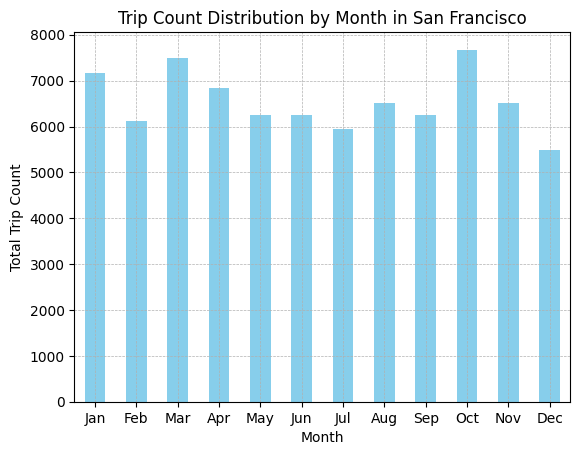

In [82]:
# Group by 'month' and sum 'trip_count', then plot
trip_counts_by_month = sf_train.groupby('month')['trip_count'].sum()

# Plotting
trip_counts_by_month.plot(kind='bar', color='skyblue', title='Trip Count Distribution by Month in San Francisco')
plt.xlabel('Month')
plt.ylabel('Total Trip Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

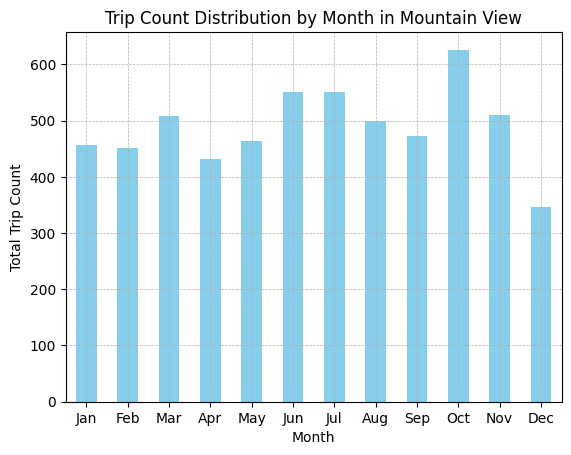

In [83]:
# Group by 'month' and sum 'trip_count', then plot
trip_counts_by_month = mv_train.groupby('month')['trip_count'].sum()

# Plotting
trip_counts_by_month.plot(kind='bar', color='skyblue', title='Trip Count Distribution by Month in Mountain View')
plt.xlabel('Month')
plt.ylabel('Total Trip Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

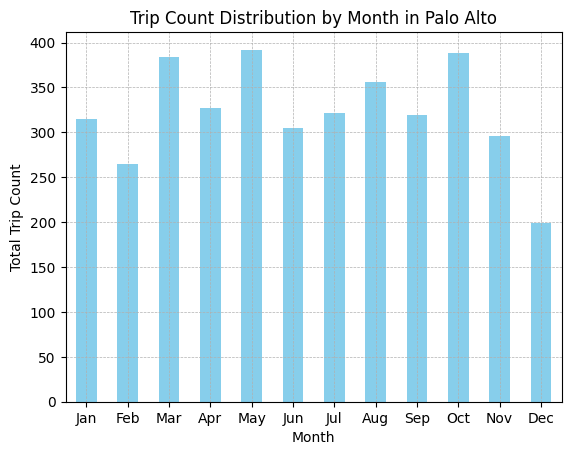

In [84]:
# Group by 'month' and sum 'trip_count', then plot
trip_counts_by_month = pa_train.groupby('month')['trip_count'].sum()

# Plotting
trip_counts_by_month.plot(kind='bar', color='skyblue', title='Trip Count Distribution by Month in Palo Alto')
plt.xlabel('Month')
plt.ylabel('Total Trip Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

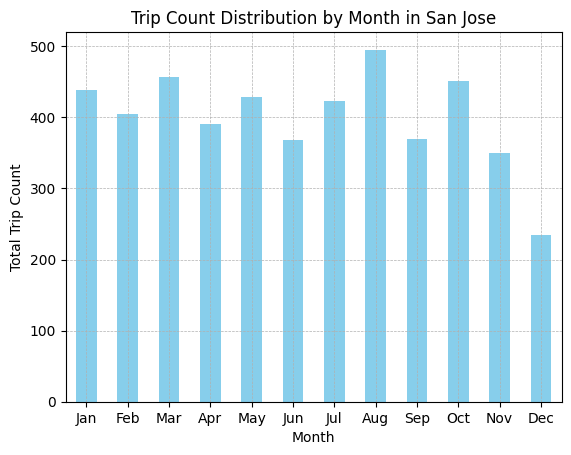

In [85]:
# Group by 'month' and sum 'trip_count', then plot
trip_counts_by_month = sj_train.groupby('month')['trip_count'].sum()

# Plotting
trip_counts_by_month.plot(kind='bar', color='skyblue', title='Trip Count Distribution by Month in San Jose')
plt.xlabel('Month')
plt.ylabel('Total Trip Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

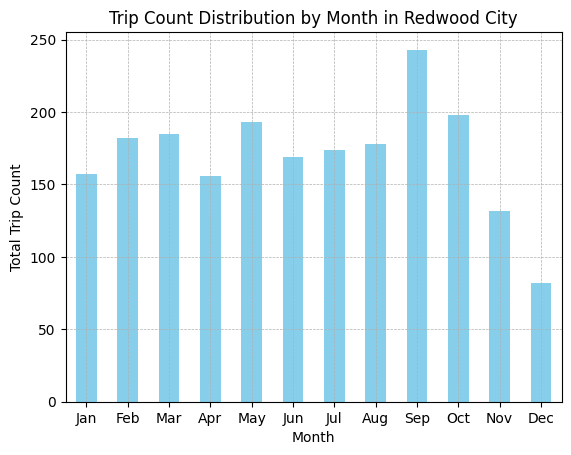

In [86]:
# Group by 'month' and sum 'trip_count', then plot
trip_counts_by_month = re_train.groupby('month')['trip_count'].sum()

# Plotting
trip_counts_by_month.plot(kind='bar', color='skyblue', title='Trip Count Distribution by Month in Redwood City')
plt.xlabel('Month')
plt.ylabel('Total Trip Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [87]:
# Convert holiday, business_day and weekday columns to int
sf_train['holiday'] = sf_train['holiday'].astype(int)
sf_train['business_day'] = sf_train['business_day'].astype(int)
sf_train['weekday'] = sf_train['weekday'].astype(int)

mv_train['holiday'] = mv_train['holiday'].astype(int)
mv_train['business_day'] = mv_train['business_day'].astype(int)
mv_train['weekday'] = mv_train['weekday'].astype(int)

re_train['holiday'] = re_train['holiday'].astype(int)
re_train['business_day'] = re_train['business_day'].astype(int)
re_train['weekday'] = re_train['weekday'].astype(int)

sj_train['holiday'] = sj_train['holiday'].astype(int)
sj_train['business_day'] = sj_train['business_day'].astype(int)
sj_train['weekday'] = sj_train['weekday'].astype(int)

pa_train['holiday'] = sj_train['holiday'].astype(int)
sj_train['business_day'] = sj_train['business_day'].astype(int)
sj_train['weekday'] = sj_train['weekday'].astype(int)

In [88]:
sf_train.dtypes

date                              datetime64[ns]
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles                     float64
max_wind_Speed_mph                       float64
mean_wind_speed_mph                      float64
max_gust_speed_mph                       float64
precipitation_inches                     float64
cloud_cover         

In [89]:
# Create labels using the 'trip_count' column for each city
labels_sf = sf_train['trip_count']
labels_mv = mv_train['trip_count']
labels_re = re_train['trip_count']
labels_sj = sj_train['trip_count']
labels_pa = pa_train['trip_count']

In [90]:
labels_sf.shape

(731,)

In [91]:
labels_sf.head()

0     37
1     19
2    115
3     77
4     31
Name: trip_count, dtype: int64

In [92]:
# Drop the 'trip_count' and 'date' column from the dataframes
sf_train.drop(['trip_count', 'date'], axis=1, inplace=True)
mv_train.drop(['trip_count', 'date'], axis=1, inplace=True)
pa_train.drop(['trip_count', 'date'], axis=1, inplace=True)
sj_train.drop(['trip_count', 'date'], axis=1, inplace=True)
re_train.drop(['trip_count', 'date'], axis=1, inplace=True)

In [93]:
sf_train.head()

max_temperature_f  mean_temperature_f  min_temperature_f  max_dew_point_f  \
0               56.0                49.0               41.0             45.0   
1               56.0                47.0               38.0             27.0   
2               60.0                54.0               48.0             48.0   
3               60.0                54.0               47.0             52.0   
4               58.0                52.0               46.0             51.0   

   mean_dew_point_f  min_dew_point_f  max_humidity  mean_humidity  \
0              40.0             36.0          83.0           69.0   
1              20.0             14.0          54.0           37.0   
2              46.0             43.0          89.0           75.0   
3              49.0             45.0          93.0           83.0   
4              46.0             42.0          93.0           83.0   

   min_humidity  max_sea_level_pressure_inches  ...  max_gust_speed_mph  \
0          55.0                          30.22  ...                10.0   
1          20.0                          30.18  ...                28.0   
2          60.0                          30.31  ...                17.0   
3          72.0                          30.05  ...                10.0   
4          72.0                          30.30  ...                22.0   

   precipitation_inches  cloud_cover     events  wind_dir_degrees  zip_code  \
0                   0.0          3.0  clear-day             290.0     94107   
1                   0.0          1.0  clear-day              40.0     94107   
2                   0.0          4.0  clear-day             310.0     94107   
3                   0.0          6.0        fog             280.0     94107   
4                   0.0          4.0  clear-day             281.0     94107   

   holiday  business_day  month  weekday  
0        0             0      1        1  
1        0             0      1        1  
2        0             0      1        1  
3        0             0      1        0  
4        0             0      1        0  

[5 rows x 27 columns]

In [94]:
events_sf = pd.get_dummies(sf_train.events, drop_first = True)
events_mv = pd.get_dummies(mv_train.events, drop_first = True)
events_re = pd.get_dummies(re_train.events, drop_first = True)
events_sj = pd.get_dummies(sj_train.events, drop_first = True)
events_pa = pd.get_dummies(pa_train.events, drop_first = True)

In [95]:
# For each city df, merge the events df with the main df
sf_train = sf_train.merge(events_sf, left_index = True, right_index = True)
mv_train = mv_train.merge(events_mv, left_index = True, right_index = True)
re_train = re_train.merge(events_re, left_index = True, right_index = True)
sj_train = sj_train.merge(events_sj, left_index = True, right_index = True)
pa_train = pa_train.merge(events_pa, left_index = True, right_index = True)

In [96]:
sf_train.head()

max_temperature_f  mean_temperature_f  min_temperature_f  max_dew_point_f  \
0               56.0                49.0               41.0             45.0   
1               56.0                47.0               38.0             27.0   
2               60.0                54.0               48.0             48.0   
3               60.0                54.0               47.0             52.0   
4               58.0                52.0               46.0             51.0   

   mean_dew_point_f  min_dew_point_f  max_humidity  mean_humidity  \
0              40.0             36.0          83.0           69.0   
1              20.0             14.0          54.0           37.0   
2              46.0             43.0          89.0           75.0   
3              49.0             45.0          93.0           83.0   
4              46.0             42.0          93.0           83.0   

   min_humidity  max_sea_level_pressure_inches  ...     events  \
0          55.0                          30.22  ...  clear-day   
1          20.0                          30.18  ...  clear-day   
2          60.0                          30.31  ...  clear-day   
3          72.0                          30.05  ...        fog   
4          72.0                          30.30  ...  clear-day   

   wind_dir_degrees  zip_code  holiday  business_day  month  weekday    fog  \
0             290.0     94107        0             0      1        1  False   
1              40.0     94107        0             0      1        1  False   
2             310.0     94107        0             0      1        1  False   
3             280.0     94107        0             0      1        0   True   
4             281.0     94107        0             0      1        0  False   

   fog-rain   rain  
0     False  False  
1     False  False  
2     False  False  
3     False  False  
4     False  False  

[5 rows x 30 columns]

In [97]:
mv_train.head()

max_temperature_f  mean_temperature_f  min_temperature_f  max_dew_point_f  \
0               59.0                48.0               36.0             42.0   
1               64.0                53.0               41.0             49.0   
2               59.0                54.0               50.0             54.0   
3               57.0                52.0               48.0             52.0   
4               62.0                55.0               48.0             54.0   

   mean_dew_point_f  min_dew_point_f  max_humidity  mean_humidity  \
0              36.0             32.0          85.0           63.0   
1              44.0             37.0          89.0           71.0   
2              52.0             48.0         100.0           92.0   
3              51.0             48.0         100.0           94.0   
4              50.0             48.0         100.0           86.0   

   min_humidity  max_sea_level_pressure_inches  ...  cloud_cover     events  \
0          40.0                          30.23  ...          0.0  clear-day   
1          52.0                          30.33  ...          2.0  clear-day   
2          82.0                          30.05  ...          6.0  clear-day   
3          82.0                          30.16  ...          5.0        fog   
4          63.0                          30.28  ...          1.0  clear-day   

   wind_dir_degrees  zip_code  holiday  business_day  month  weekday    fog  \
0             348.0     94301        0             0      1        1  False   
1             350.0     94301        0             0      1        1  False   
2             350.0     94301        0             0      1        0  False   
3               6.0     94301        0             0      1        0   True   
4             357.0     94301        0             0      1        1  False   

    rain  
0  False  
1  False  
2  False  
3  False  
4  False  

[5 rows x 29 columns]

In [98]:
re_train.head()

max_temperature_f  mean_temperature_f  min_temperature_f  max_dew_point_f  \
0               59.0                54.0               48.0             54.0   
1               59.0                50.0               41.0             46.0   
2               62.0                53.0               44.0             50.0   
3               62.0                53.0               44.0             48.0   
4               69.0                55.0               41.0             45.0   

   mean_dew_point_f  min_dew_point_f  max_humidity  mean_humidity  \
0              48.0             46.0         100.0           90.0   
1              41.0             36.0         100.0           78.0   
2              46.0             43.0         100.0           90.0   
3              43.0             37.0         100.0           78.0   
4              33.0             27.0          81.0           54.0   

   min_humidity  max_sea_level_pressure_inches  ...     events  \
0          67.0                          30.06  ...  clear-day   
1          44.0                          30.40  ...  clear-day   
2          59.0                          30.29  ...  clear-day   
3          45.0                          30.24  ...  clear-day   
4          20.0                          30.46  ...  clear-day   

   wind_dir_degrees  zip_code  holiday  business_day  month  weekday    fog  \
0             325.0     94063        0             0      1        0  False   
1             271.0     94063        0             0      1        0  False   
2              36.0     94063        0             0      1        1  False   
3             192.0     94063        0             0      1        1  False   
4             222.0     94063        0             0      1        1  False   

   fog-rain   rain  
0     False  False  
1     False  False  
2     False  False  
3     False  False  
4     False  False  

[5 rows x 30 columns]

In [99]:
sj_train.head()

max_temperature_f  mean_temperature_f  min_temperature_f  max_dew_point_f  \
0               62.0                52.0               41.0             48.0   
1               61.0                54.0               46.0             50.0   
2               59.0                51.0               43.0             50.0   
3               55.0                50.0               44.0             50.0   
4               60.0                52.0               43.0             46.0   

   mean_dew_point_f  min_dew_point_f  max_humidity  mean_humidity  \
0              43.0             37.0          86.0           69.0   
1              47.0             44.0         100.0           80.0   
2              44.0             40.0          93.0           78.0   
3              47.0             43.0         100.0           92.0   
4              41.0             35.0         100.0           72.0   

   min_humidity  max_sea_level_pressure_inches  ...     events  \
0          52.0                          30.31  ...  clear-day   
1          60.0                          30.05  ...  clear-day   
2          62.0                          30.30  ...  clear-day   
3          83.0                          30.19  ...        fog   
4          44.0                          30.38  ...  clear-day   

   wind_dir_degrees  zip_code  holiday  business_day  month  weekday    fog  \
0             297.0     95113        0             0      1        1  False   
1             293.0     95113        0             0      1        0  False   
2             349.0     95113        0             0      1        0  False   
3             292.0     95113        0             0      1        0   True   
4             264.0     95113        0             0      1        0  False   

   fog-rain   rain  
0     False  False  
1     False  False  
2     False  False  
3     False  False  
4     False  False  

[5 rows x 30 columns]

In [100]:
pa_train.head()

max_temperature_f  mean_temperature_f  min_temperature_f  max_dew_point_f  \
0               59.0                48.0               36.0             42.0   
1               64.0                53.0               41.0             49.0   
2               57.0                52.0               48.0             52.0   
3               60.0                51.0               42.0             45.0   
4               62.0                55.0               48.0             54.0   

   mean_dew_point_f  min_dew_point_f  max_humidity  mean_humidity  \
0              36.0             32.0          85.0           63.0   
1              44.0             37.0          89.0           71.0   
2              51.0             48.0         100.0           94.0   
3              41.0             36.0          93.0           68.0   
4              50.0             48.0         100.0           86.0   

   min_humidity  max_sea_level_pressure_inches  ...  cloud_cover     events  \
0          40.0                          30.23  ...          0.0  clear-day   
1          52.0                          30.33  ...          2.0  clear-day   
2          82.0                          30.16  ...          5.0        fog   
3          42.0                          30.40  ...          2.0  clear-day   
4          63.0                          30.28  ...          1.0  clear-day   

   wind_dir_degrees  zip_code  holiday  business_day  month  weekday    fog  \
0             348.0     94301        0         False      1     True  False   
1             350.0     94301        0         False      1     True  False   
2               6.0     94301        0         False      1    False   True   
3             293.0     94301        0         False      1    False  False   
4             357.0     94301        0         False      1     True  False   

    rain  
0  False  
1  False  
2  False  
3  False  
4  False  

[5 rows x 29 columns]

In [101]:
sf_train.head()

max_temperature_f  mean_temperature_f  min_temperature_f  max_dew_point_f  \
0               56.0                49.0               41.0             45.0   
1               56.0                47.0               38.0             27.0   
2               60.0                54.0               48.0             48.0   
3               60.0                54.0               47.0             52.0   
4               58.0                52.0               46.0             51.0   

   mean_dew_point_f  min_dew_point_f  max_humidity  mean_humidity  \
0              40.0             36.0          83.0           69.0   
1              20.0             14.0          54.0           37.0   
2              46.0             43.0          89.0           75.0   
3              49.0             45.0          93.0           83.0   
4              46.0             42.0          93.0           83.0   

   min_humidity  max_sea_level_pressure_inches  ...     events  \
0          55.0                          30.22  ...  clear-day   
1          20.0                          30.18  ...  clear-day   
2          60.0                          30.31  ...  clear-day   
3          72.0                          30.05  ...        fog   
4          72.0                          30.30  ...  clear-day   

   wind_dir_degrees  zip_code  holiday  business_day  month  weekday    fog  \
0             290.0     94107        0             0      1        1  False   
1              40.0     94107        0             0      1        1  False   
2             310.0     94107        0             0      1        1  False   
3             280.0     94107        0             0      1        0   True   
4             281.0     94107        0             0      1        0  False   

   fog-rain   rain  
0     False  False  
1     False  False  
2     False  False  
3     False  False  
4     False  False  

[5 rows x 30 columns]

In [102]:
sj_train.head()

max_temperature_f  mean_temperature_f  min_temperature_f  max_dew_point_f  \
0               62.0                52.0               41.0             48.0   
1               61.0                54.0               46.0             50.0   
2               59.0                51.0               43.0             50.0   
3               55.0                50.0               44.0             50.0   
4               60.0                52.0               43.0             46.0   

   mean_dew_point_f  min_dew_point_f  max_humidity  mean_humidity  \
0              43.0             37.0          86.0           69.0   
1              47.0             44.0         100.0           80.0   
2              44.0             40.0          93.0           78.0   
3              47.0             43.0         100.0           92.0   
4              41.0             35.0         100.0           72.0   

   min_humidity  max_sea_level_pressure_inches  ...     events  \
0          52.0                          30.31  ...  clear-day   
1          60.0                          30.05  ...  clear-day   
2          62.0                          30.30  ...  clear-day   
3          83.0                          30.19  ...        fog   
4          44.0                          30.38  ...  clear-day   

   wind_dir_degrees  zip_code  holiday  business_day  month  weekday    fog  \
0             297.0     95113        0             0      1        1  False   
1             293.0     95113        0             0      1        0  False   
2             349.0     95113        0             0      1        0  False   
3             292.0     95113        0             0      1        0   True   
4             264.0     95113        0             0      1        0  False   

   fog-rain   rain  
0     False  False  
1     False  False  
2     False  False  
3     False  False  
4     False  False  

[5 rows x 30 columns]

In [103]:
re_train.head()

max_temperature_f  mean_temperature_f  min_temperature_f  max_dew_point_f  \
0               59.0                54.0               48.0             54.0   
1               59.0                50.0               41.0             46.0   
2               62.0                53.0               44.0             50.0   
3               62.0                53.0               44.0             48.0   
4               69.0                55.0               41.0             45.0   

   mean_dew_point_f  min_dew_point_f  max_humidity  mean_humidity  \
0              48.0             46.0         100.0           90.0   
1              41.0             36.0         100.0           78.0   
2              46.0             43.0         100.0           90.0   
3              43.0             37.0         100.0           78.0   
4              33.0             27.0          81.0           54.0   

   min_humidity  max_sea_level_pressure_inches  ...     events  \
0          67.0                          30.06  ...  clear-day   
1          44.0                          30.40  ...  clear-day   
2          59.0                          30.29  ...  clear-day   
3          45.0                          30.24  ...  clear-day   
4          20.0                          30.46  ...  clear-day   

   wind_dir_degrees  zip_code  holiday  business_day  month  weekday    fog  \
0             325.0     94063        0             0      1        0  False   
1             271.0     94063        0             0      1        0  False   
2              36.0     94063        0             0      1        1  False   
3             192.0     94063        0             0      1        1  False   
4             222.0     94063        0             0      1        1  False   

   fog-rain   rain  
0     False  False  
1     False  False  
2     False  False  
3     False  False  
4     False  False  

[5 rows x 30 columns]

In [104]:
# For each dataframe, drop 'events' column
sf_train.drop(['events'], axis=1, inplace=True)
mv_train.drop(['events'], axis=1, inplace=True)
re_train.drop(['events'], axis=1, inplace=True)
sj_train.drop(['events'], axis=1, inplace=True)
pa_train.drop(['events'], axis=1, inplace=True)

In [105]:
# Write each model to a csv file
sf_train.to_csv('train_sf.csv', index=False)
mv_train.to_csv('train_mv.csv', index=False)
re_train.to_csv('train_re.csv', index=False)
sj_train.to_csv('train_sj.csv', index=False)
pa_train.to_csv('train_pa.csv', index=False)

In [106]:
# Write labels to a csv file
labels_sf.to_csv('labels_sf.csv', index=False)
labels_mv.to_csv('labels_mv.csv', index=False)
labels_re.to_csv('labels_re.csv', index=False)
labels_sj.to_csv('labels_sj.csv', index=False)
labels_pa.to_csv('labels_pa.csv', index=False)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

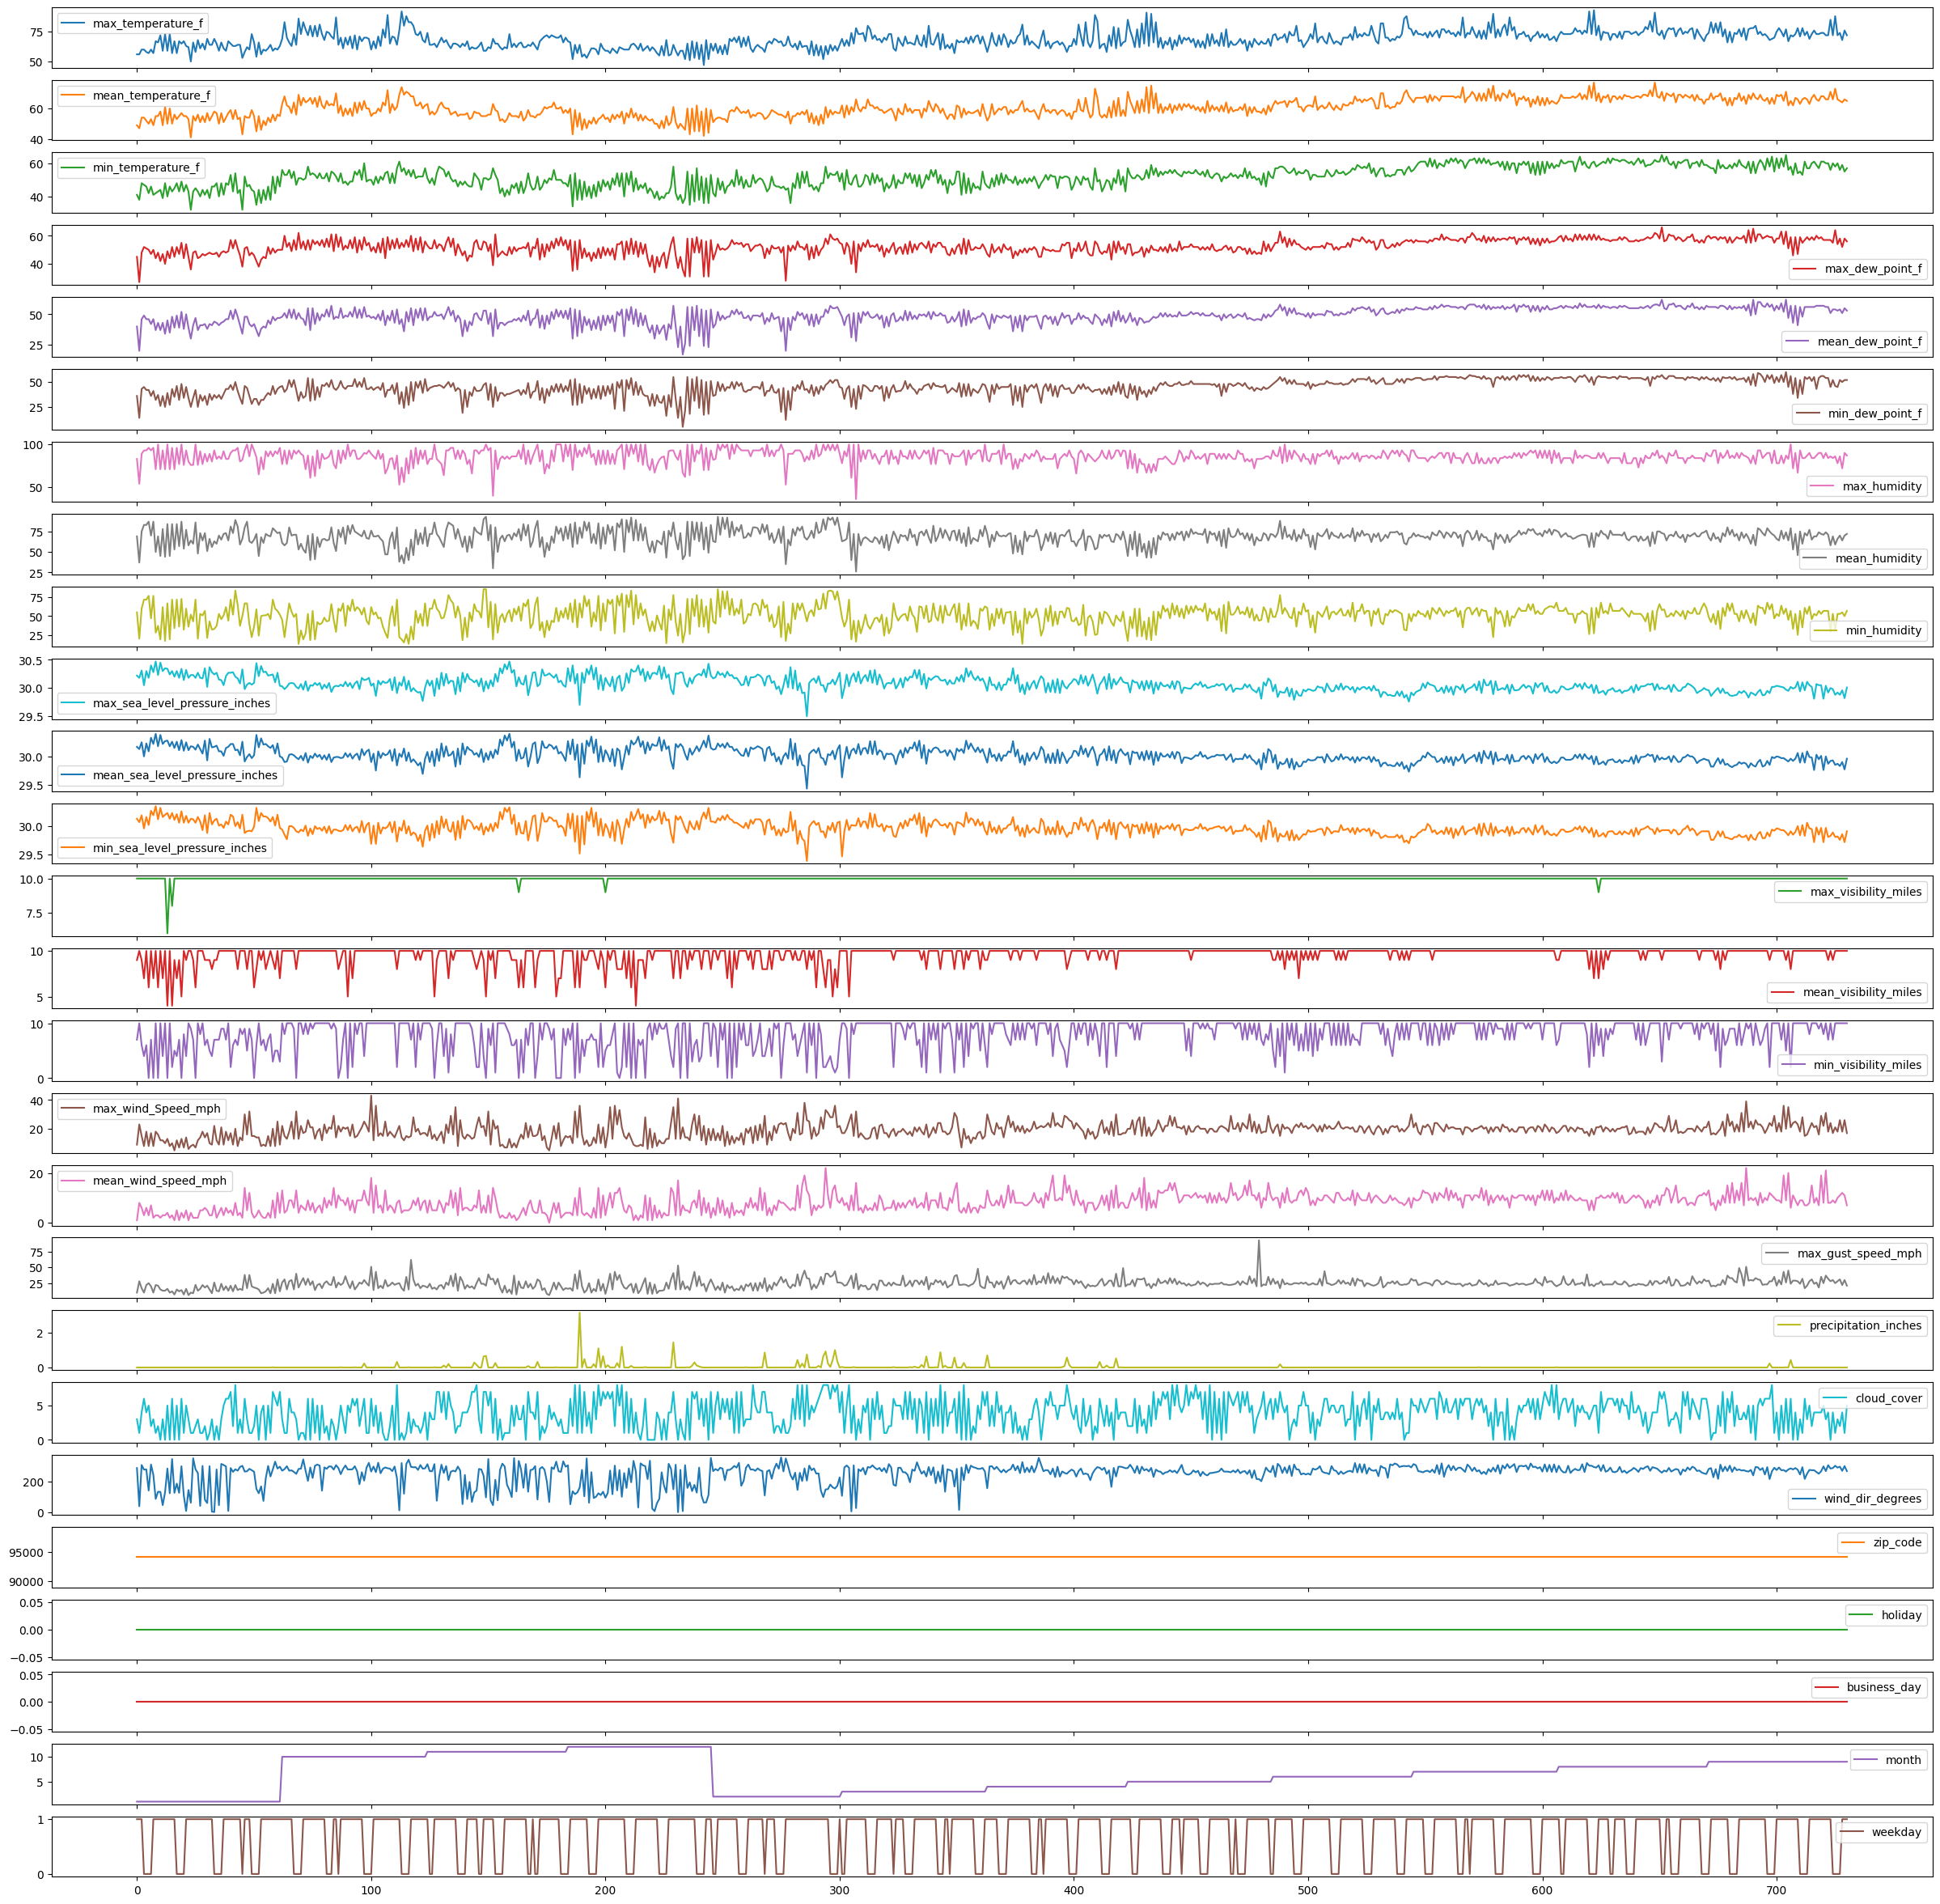

In [107]:
# For training set for each city, plot subplots
sf_train.plot(subplots=True, figsize=(30, 30))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

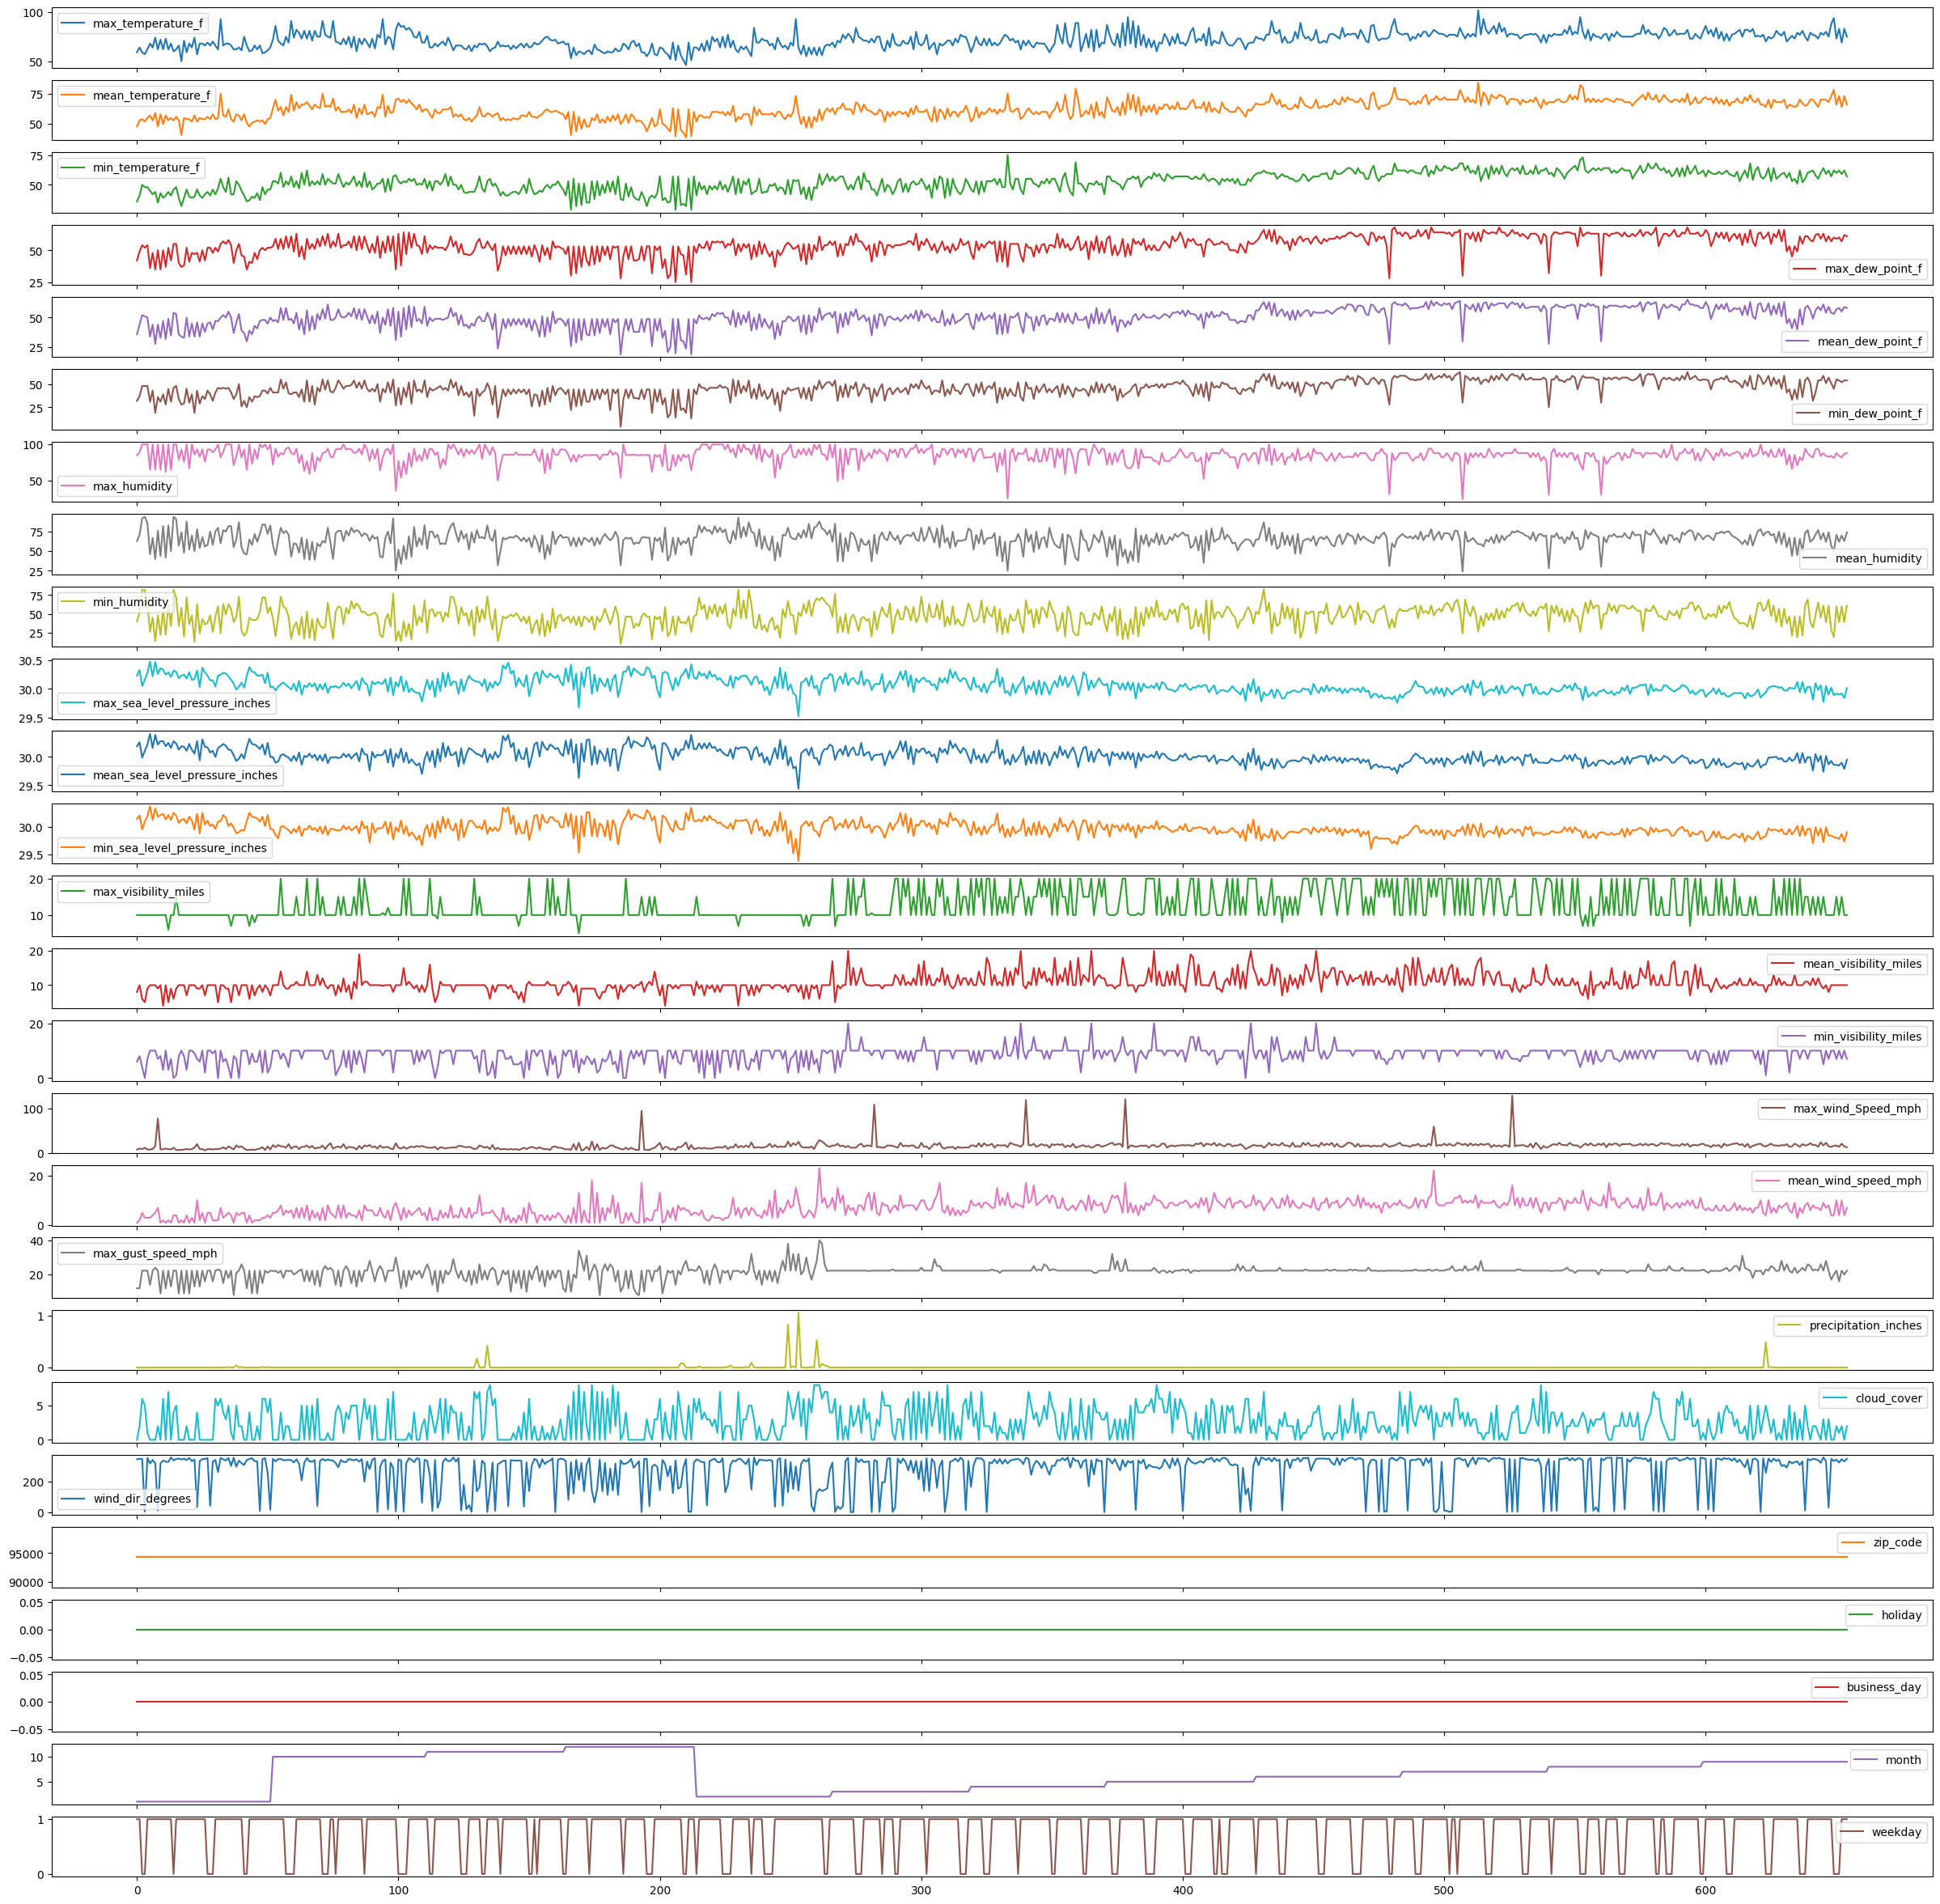

In [108]:
# For training set for each city, plot subplots
mv_train.plot(subplots=True, figsize=(30, 30))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

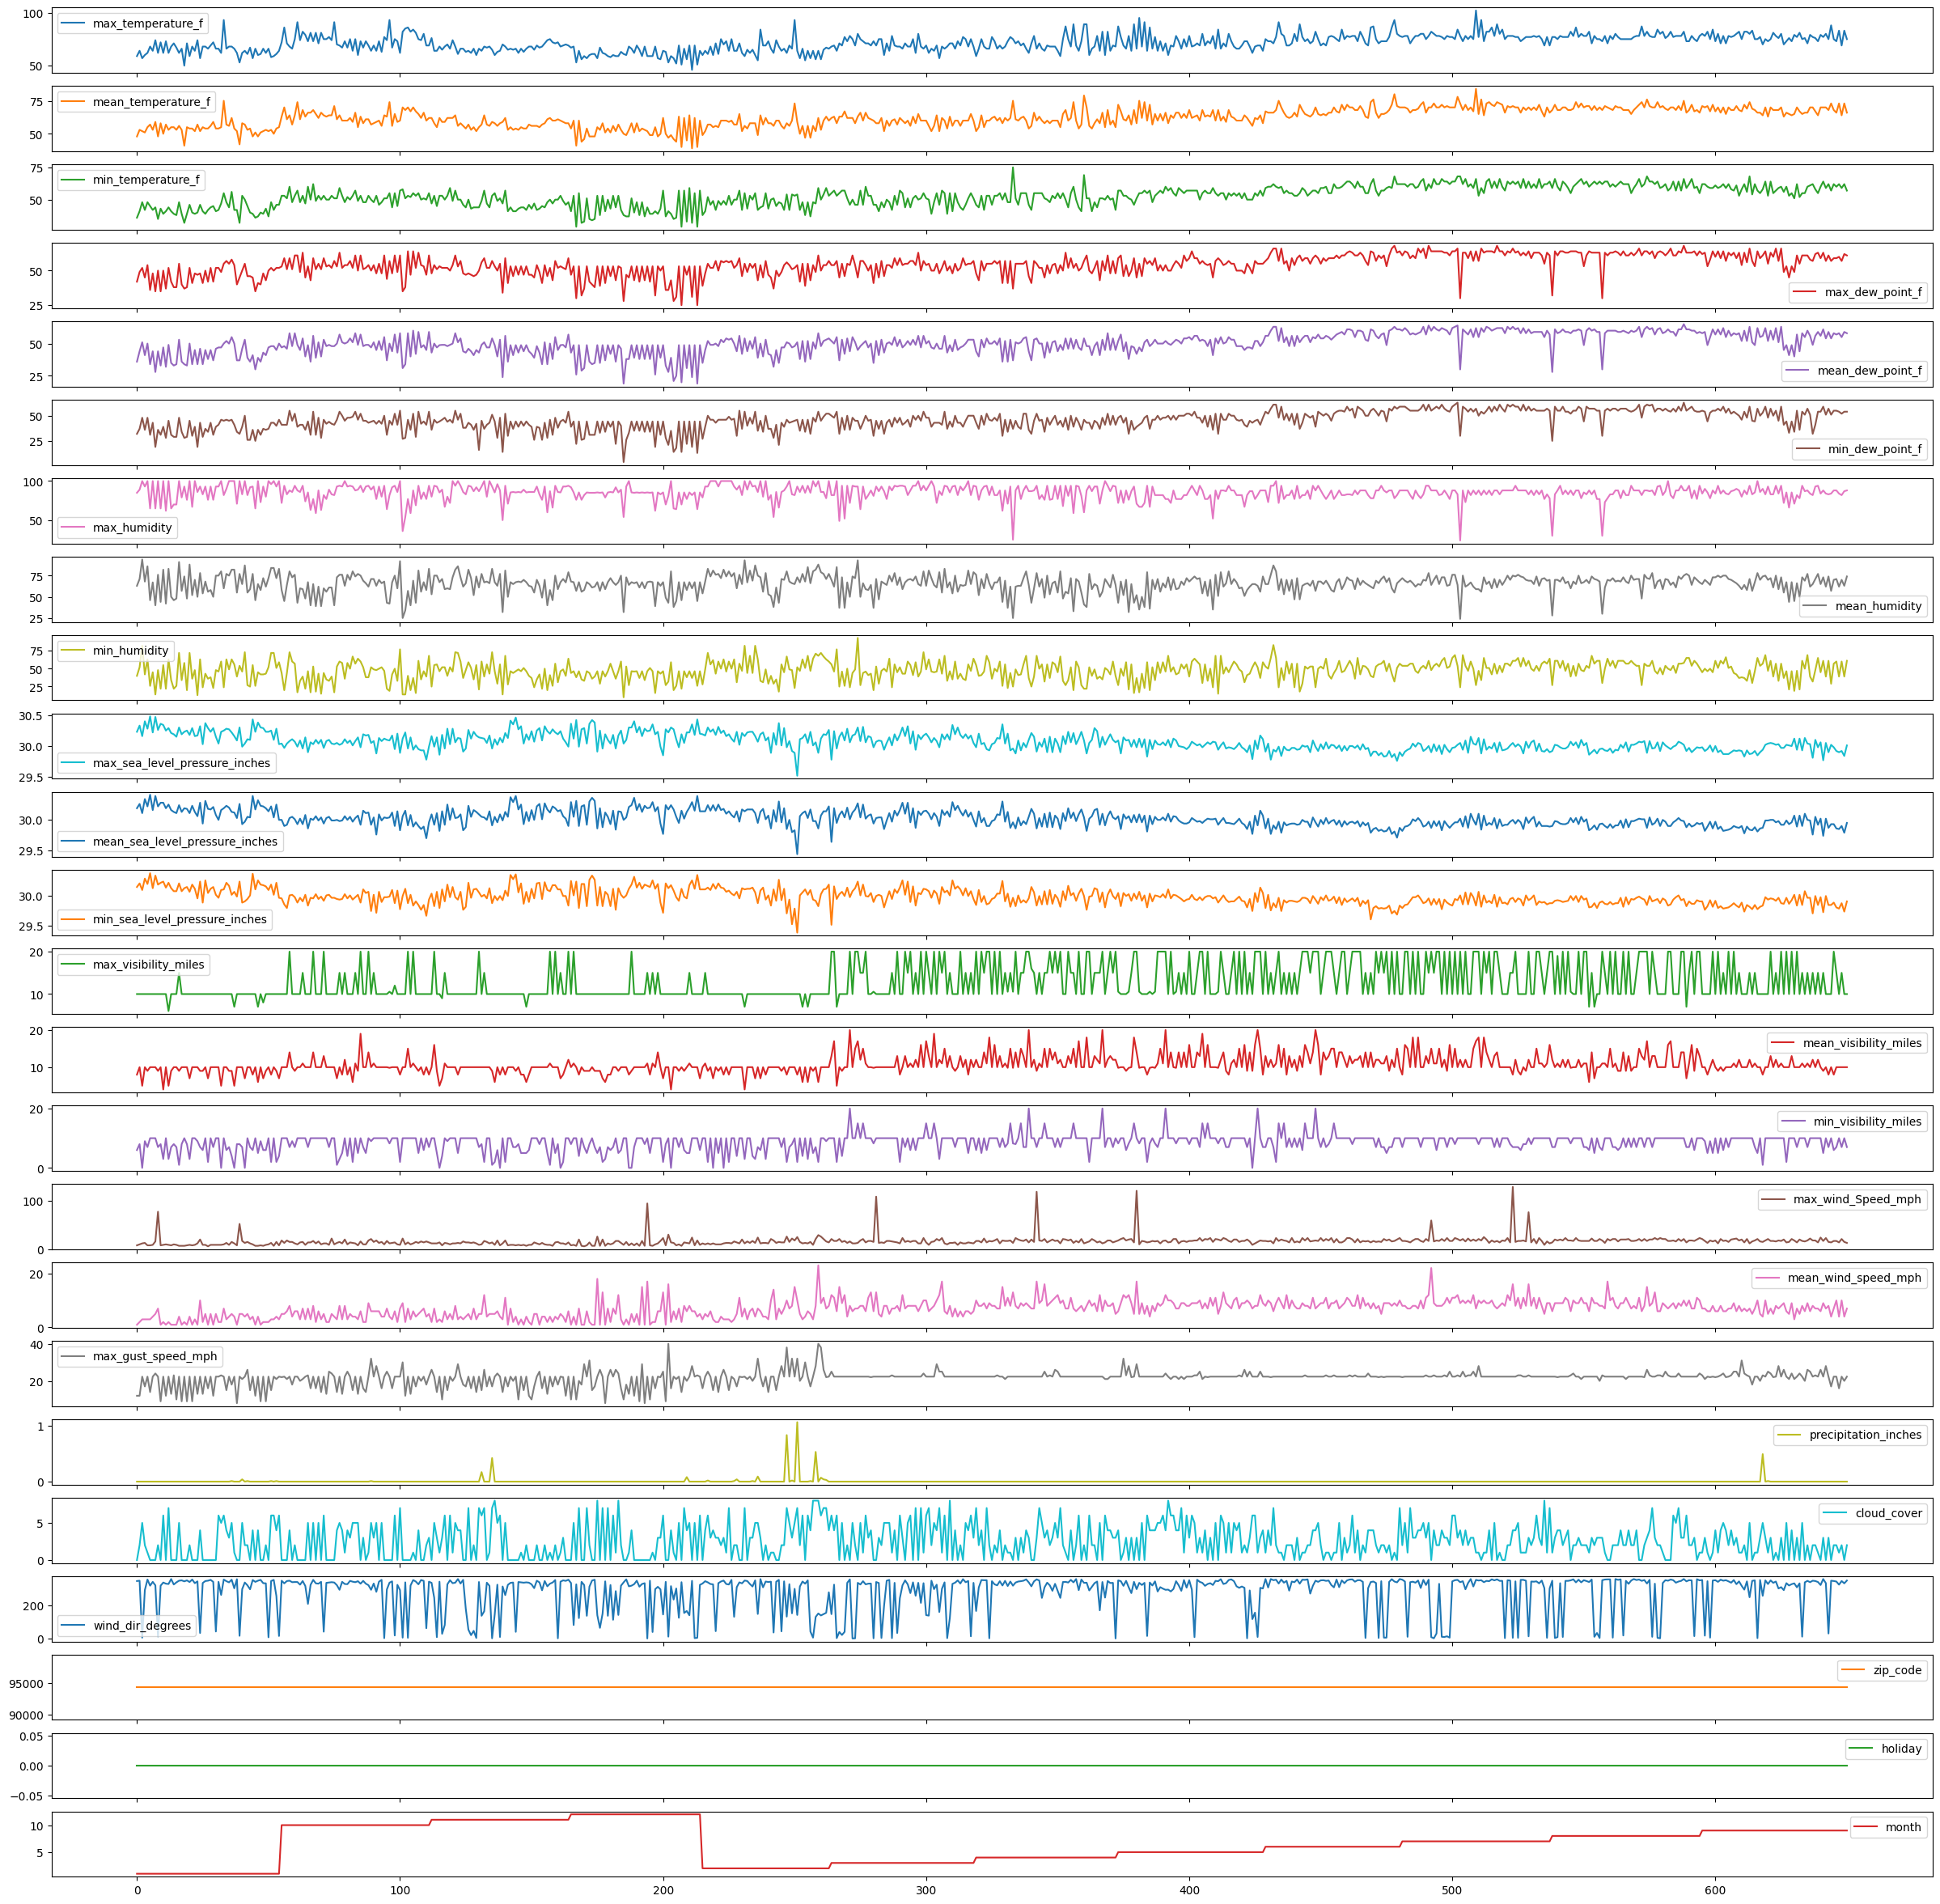

In [109]:
# For training set for each city, plot subplots
pa_train.plot(subplots=True, figsize=(30, 30))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

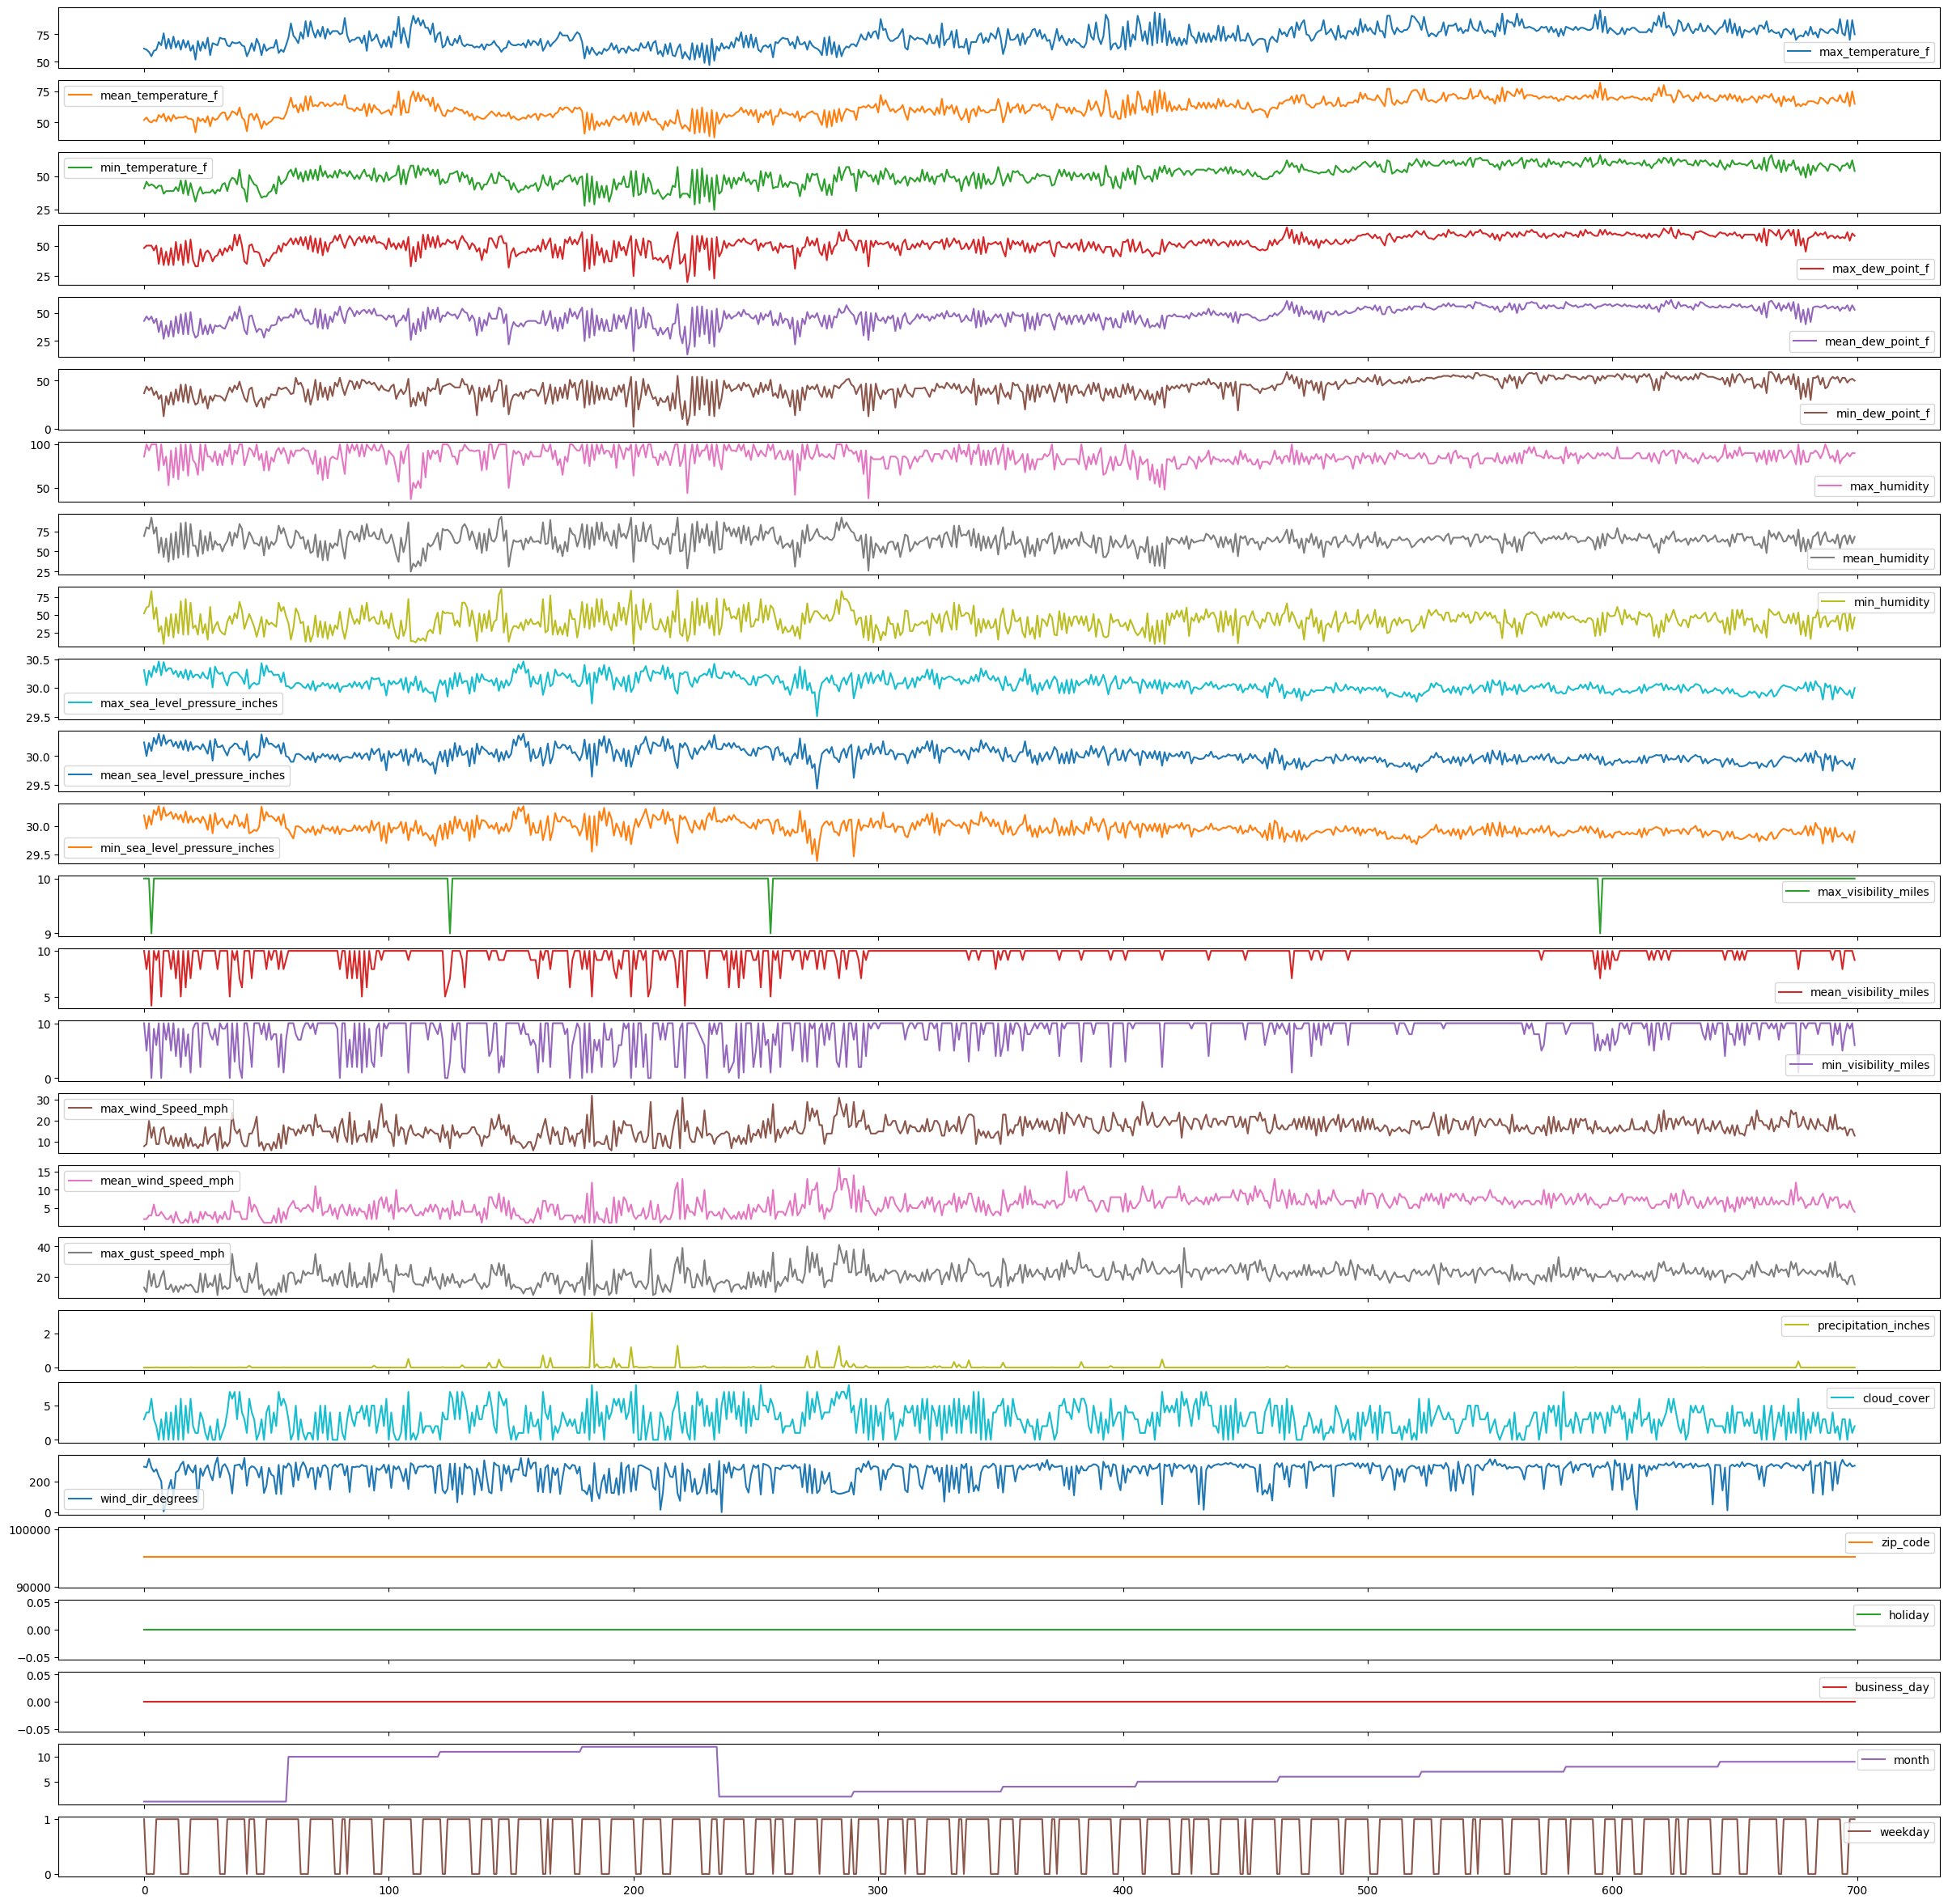

In [110]:
# For training set for each city, plot subplots
sj_train.plot(subplots=True, figsize=(30, 30))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

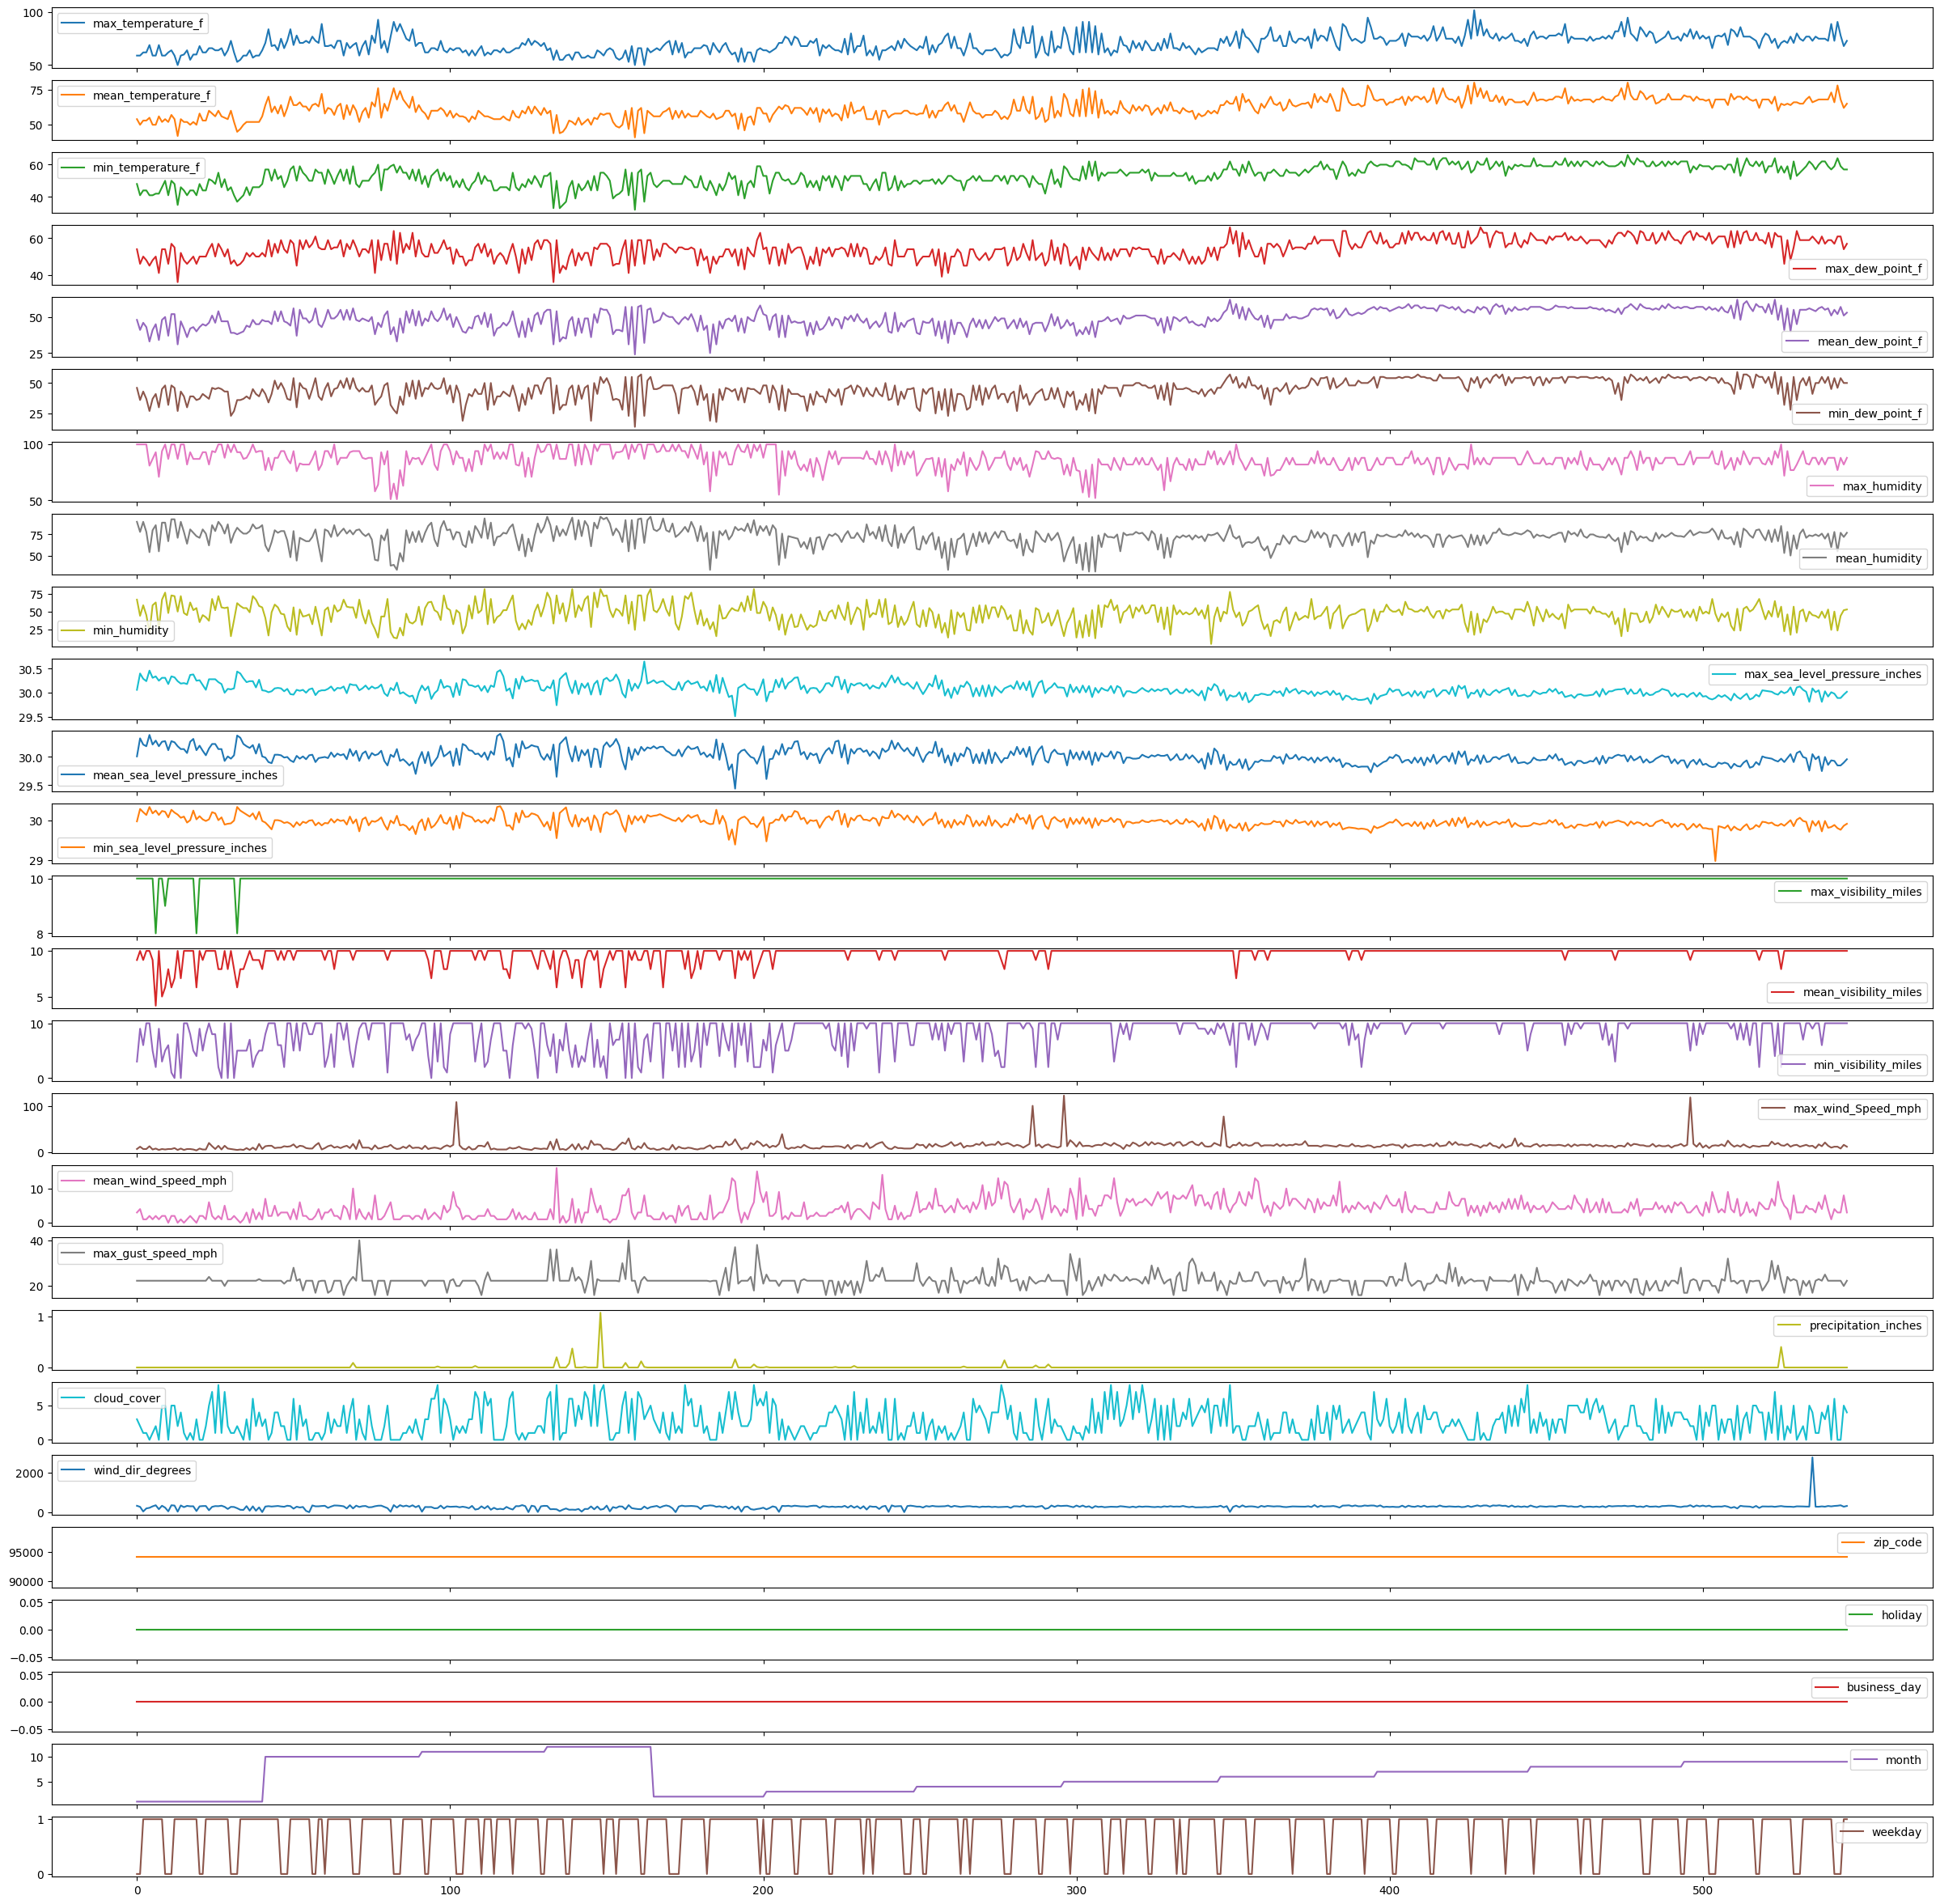

In [111]:
# For training set for each city, plot subplots
re_train.plot(subplots=True, figsize=(30, 30))